### **<h1 style="color: #ff5ab2;">Prenatal Healthcare and Outcomes</h1>**
<hr style="border: 2px solid orange;">

<h3 style="color: orange;">Importing Packages</h1

In [7]:
import numpy as np
from scipy import stats
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
%config InlineBackend.figure_format = 'retina'
sns.set_style('whitegrid')

<hr style="border: 1px solid orange;">
<h1 style="color: #ff5ab2;">Introduction</h1>
<hr style="border: 1px solid orange;">

<h4 style="color: #ff5ab2;">Maternal and infant health outcomes are critical indicators of a region's overall healthcare access and quality. Disparities in these outcomes often reflect systemic healthcare infrastructure differences, socioeconomic status of individuals, social determinants, and geographic accessibility. This report examines data from the Health Resources and Services Administration (HRSA) to explore factors associated with infant mortality, preterm births, and prenatal care across five jurisdictions: the District of Columbia, New Jersey, New York, Texas, and Puerto Rico.</h1>

<h4 style="color: #ff5ab2;">This dataset includes county-level or regional data on OB-GYN provider availability, hospitals offering obstetric care, prenatal care initiation, low birth weight rates, infant mortality rates, and population density of women between 2020 and 2022.   </h1>

<h4 style="color: #ff5ab2;">Additional information within this dataset are NCHS Urban-Rural Classifications divided by county, helping to determine each geographic area.  </h1>

<h4 style="color: #ff5ab2;">Through the analysis of this dataset, the report aims to identify patterns and relationships within and between the areas of interest, which may help to explain variation in maternal and infant outcomes across urban-rural settings.  </h1>

<h4 style="color: #ff5ab2;">First trimester prenatal care is an especially important predictor of birth outcomes and health of the mother. During the first trimester, there is rapid fetal development, necessitating the early elimination of toxins and harmful substances from the mother's environment to ensure healthy development of organs and body systems within the fetus. Access is not determined soley by the pregnant individual, but is impacted by systemic factors and resources which are analyzed in this report.  </h1>

<h4 style="color: #ff5ab2;">The goal of this analysis is to highlight geographic and structural disparties, at the same time making a comparison to outcomes of those areas. This will help to support recommendations to improve maternal and infant health equity across all communities.  </h1>

<hr style="border: 1px solid orange;">
<h1 style="color: #ff5ab2;">Methods</h1>
<hr style="border: 1px solid orange;">

<h4 style="color: #ff5ab2;">This report utilizes data exported from the Heath Resources & Services Administration: Maternal & Child Health Mapping Tool between 2020 and 2022. Data was available for all 50 states and territories of the United States, and the five chosen areas for export were: District of Columbia, New Jersey, New York, Texas, and Puerto Rico.    

*<h4 style="color: #ff5ab2;">The dataset includes county-level records of:* 

1. Hospitals with Obstetric Care (# per county)   

2. OB-GYN Provider Rate (per 100,000 population)   

3. Prenatal Care in the 1st Trimester (%)  

4. Preterm Birth Rate (%)  

5. Low Birth Weight Rate (%)   

6. Infant Mortality Rate (per 1,000 live births) 

7. Population Density of Women Ages 15-44 (per square mile) 

8. Urban-Rural Classification (NCHS 6 category scale)</h4>

<h4 style="color: #ff5ab2;">The software used for this analysis is Python 3.12.0 within the Visual Studio Code application. Summary statistics were generated using the Pandas library for each variable within the dataset individually. Matplotlib, Seaborn, and Pandas are utilized to create visual representations of the data. </h1>

<hr style="border: 1px solid orange;">
<h1 style="color: #ff5ab2;">Results</h1>
<hr style="border: 1px solid orange;">

<h3 style="color: orange;">Checking Data</h1

In [9]:
df = pd.read_csv('HRSA data 2.csv')

In [10]:
df.shape

(416, 14)

<h3 style="color: orange;">Exploratory Data Analysis</h1

*<h4 style="color: #ff5ab2;">State Information</h1>*

In [11]:
#calculate the frequency of each state
state_counts = df['State'].value_counts()
state_counts

State
Texas                   254
Puerto Rico              78
New York                 62
New Jersey               21
District of Columbia      1
Name: count, dtype: int64

In [12]:
# calculate the proportion of each state
state_proportions = df['State'].value_counts(normalize=True)
state_proportions

State
Texas                   0.610577
Puerto Rico             0.187500
New York                0.149038
New Jersey              0.050481
District of Columbia    0.002404
Name: proportion, dtype: float64

<h5 style="color: orange;">These two calculations reveal the representation of each state within the data, as there are many more data points from Texas, which makes up 61% of the data, than the District of Columbia which makes up 0.2% of the total data points. This data set has extremely varied counts dependant on state due to the nature of individuals states within the U.S. as each has different geographic areas and county divisions. </h5

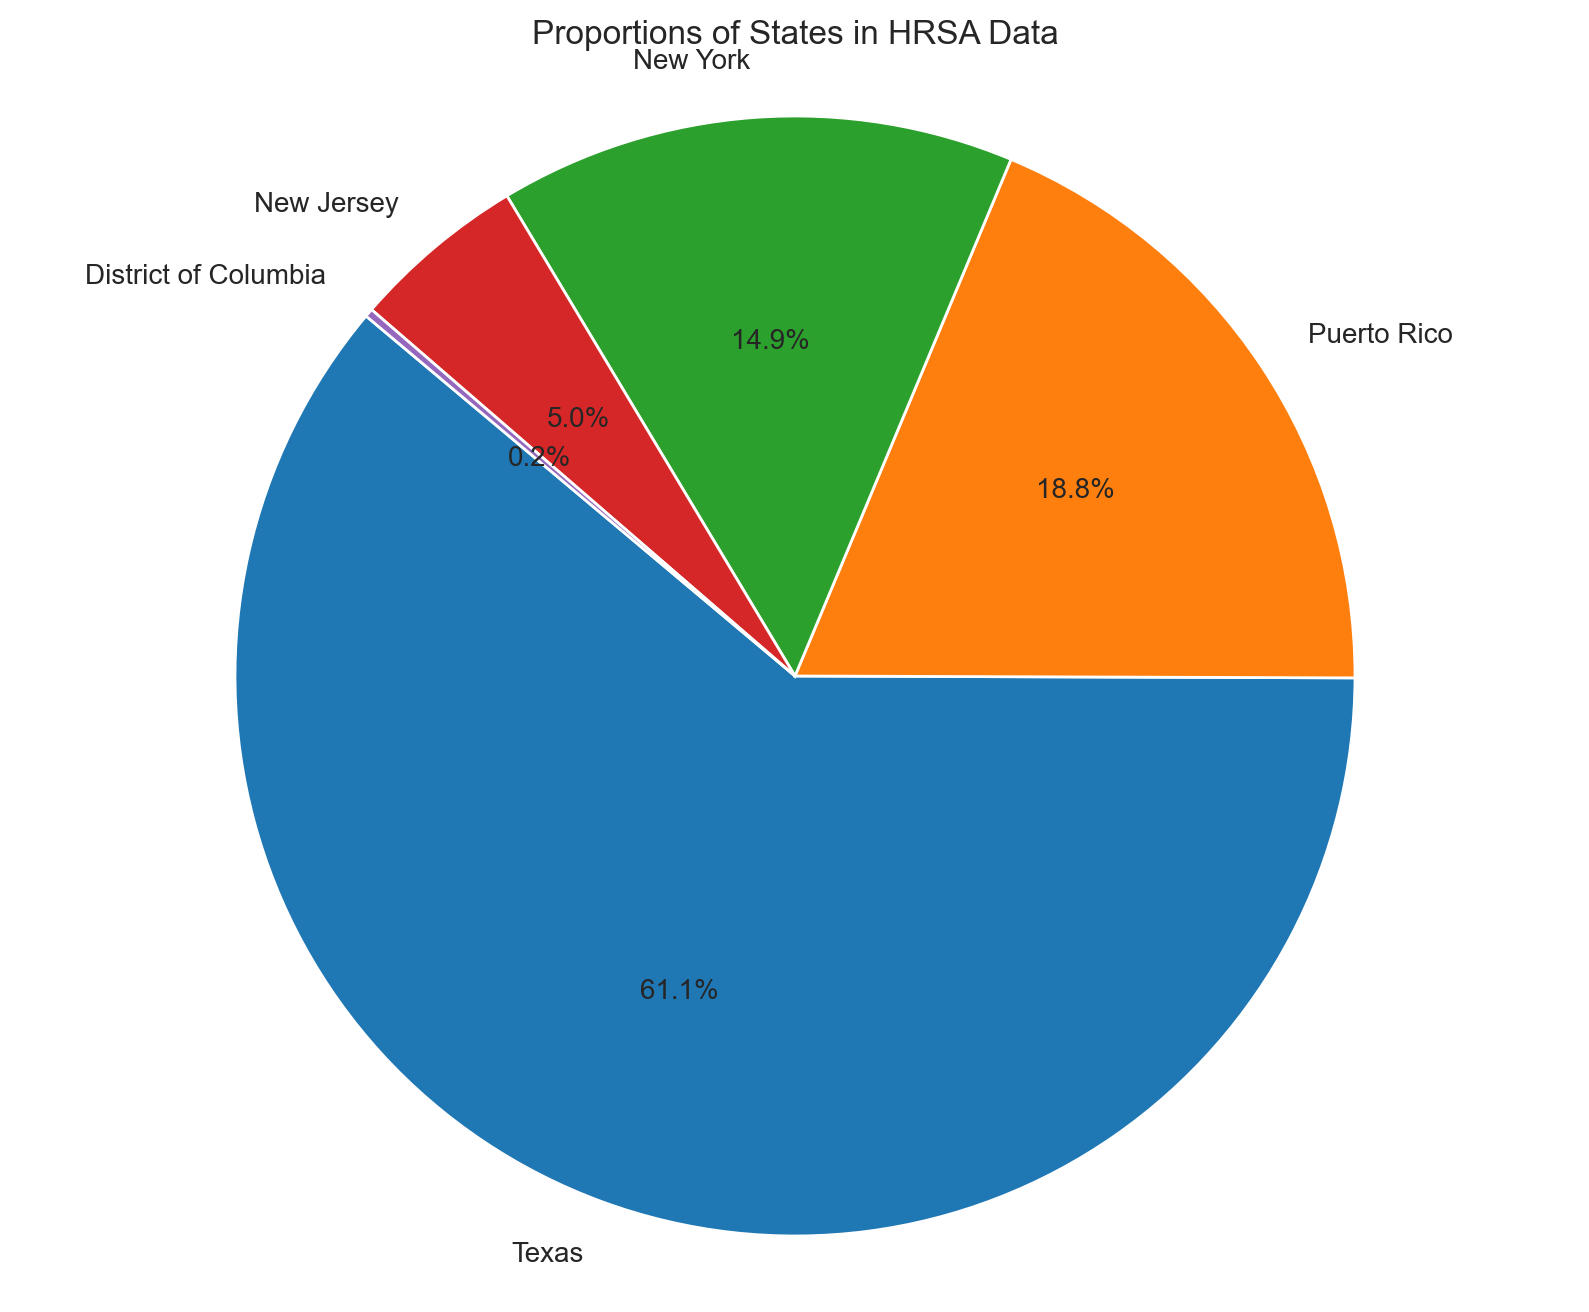

In [13]:
#create a pie chart for the proportions of each state
plt.figure(figsize=(10, 8))
plt.pie(state_proportions, labels=state_proportions.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportions of States in HRSA Data')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

<h5 style="color: orange;"> 

The pie chart of proportions of states in HRSA Data provides a visual representation of the amount of data within the dataset that can be attributed to each state. 

Texas makes up greater than the majority of the total data, with Puerto Rico next and then New York.</h5> 

*<h4 style="color: #ff5ab2;">Hospitals with Obstetric Care (#)</h1>*

In [14]:
# I want summary statistics for the hospitals with obstetric care
df['Hospitals with Obstetric Care (#)'].describe()

count    416.000000
mean       0.834135
std        1.739378
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       18.000000
Name: Hospitals with Obstetric Care (#), dtype: float64

<h5 style="color: orange;">These summary statistics of the Hospitals with Obstetric Care (#) data column reveals that the total count of hospitals within the data is 416, with a mean below 1 hospital per county across all states.</h5

In [15]:
#give summary stastistics for the hospitals with obstetric care divided by state
df.groupby('State')['Hospitals with Obstetric Care (#)'].describe()


,count,mean,std,min,25%,50%,75%,max
State,,,,,,,,
District of Columbia,1.0,4.000000,NaN,4.0,4.0,4.0,4.0,4.0
New Jersey,21.0,2.000000,1.581139,0.0,1.0,1.0,3.0,5.0
New York,62.0,1.532258,1.964586,0.0,0.0,1.0,2.0,8.0
Puerto Rico,78.0,0.076923,0.268194,0.0,0.0,0.0,0.0,1.0
Texas,254.0,0.787402,1.833504,0.0,0.0,0.0,1.0,18.0


<h5 style="color: orange;"> 

Once divided by state, the data looks very different. Within the District of Columbia , there are four hospitals with obstetric care, however the data is not divided by county as D.C. utilizes Wards to split up the neighborhoods.   

New Jersey has a total of 21 hospitals, with the mean value within each county totaling two. However, the minimum does reach down to no hospitals with obstetric care within a county, meaning that pregnant women in this area would have to travel farther to recieve care, all the way up to a maximum of 5 hospitals. 

Statistics for New York are similar, however the total count is 62, with a mean of 1.53 and maximum of eight hospitals within a specific county. 

Puerto Rico has 78 total hospitals with obstetric care, however the mean per county is 0.0769. This is helpful in understanding that there may be a large number of hospitals, they are most likely concentrated in a small number of locations and may not be accessible to all pregnant people. 

Texas has the largest count of 254, but again has a mean count per county below one, at 0.7874. The maximum number of hospitals within one county is 18, which is an extremely large value and may represent a large city area with a high concentration of individuals.</h5>

<h5 style="color: orange;">Though the face value count of hospitals with obstetric care does not directly reveal the ease or difficulty that women will face traveling to these facilities, this data point does help to hint at areas of extreme concentration versus extreme lack.</h5

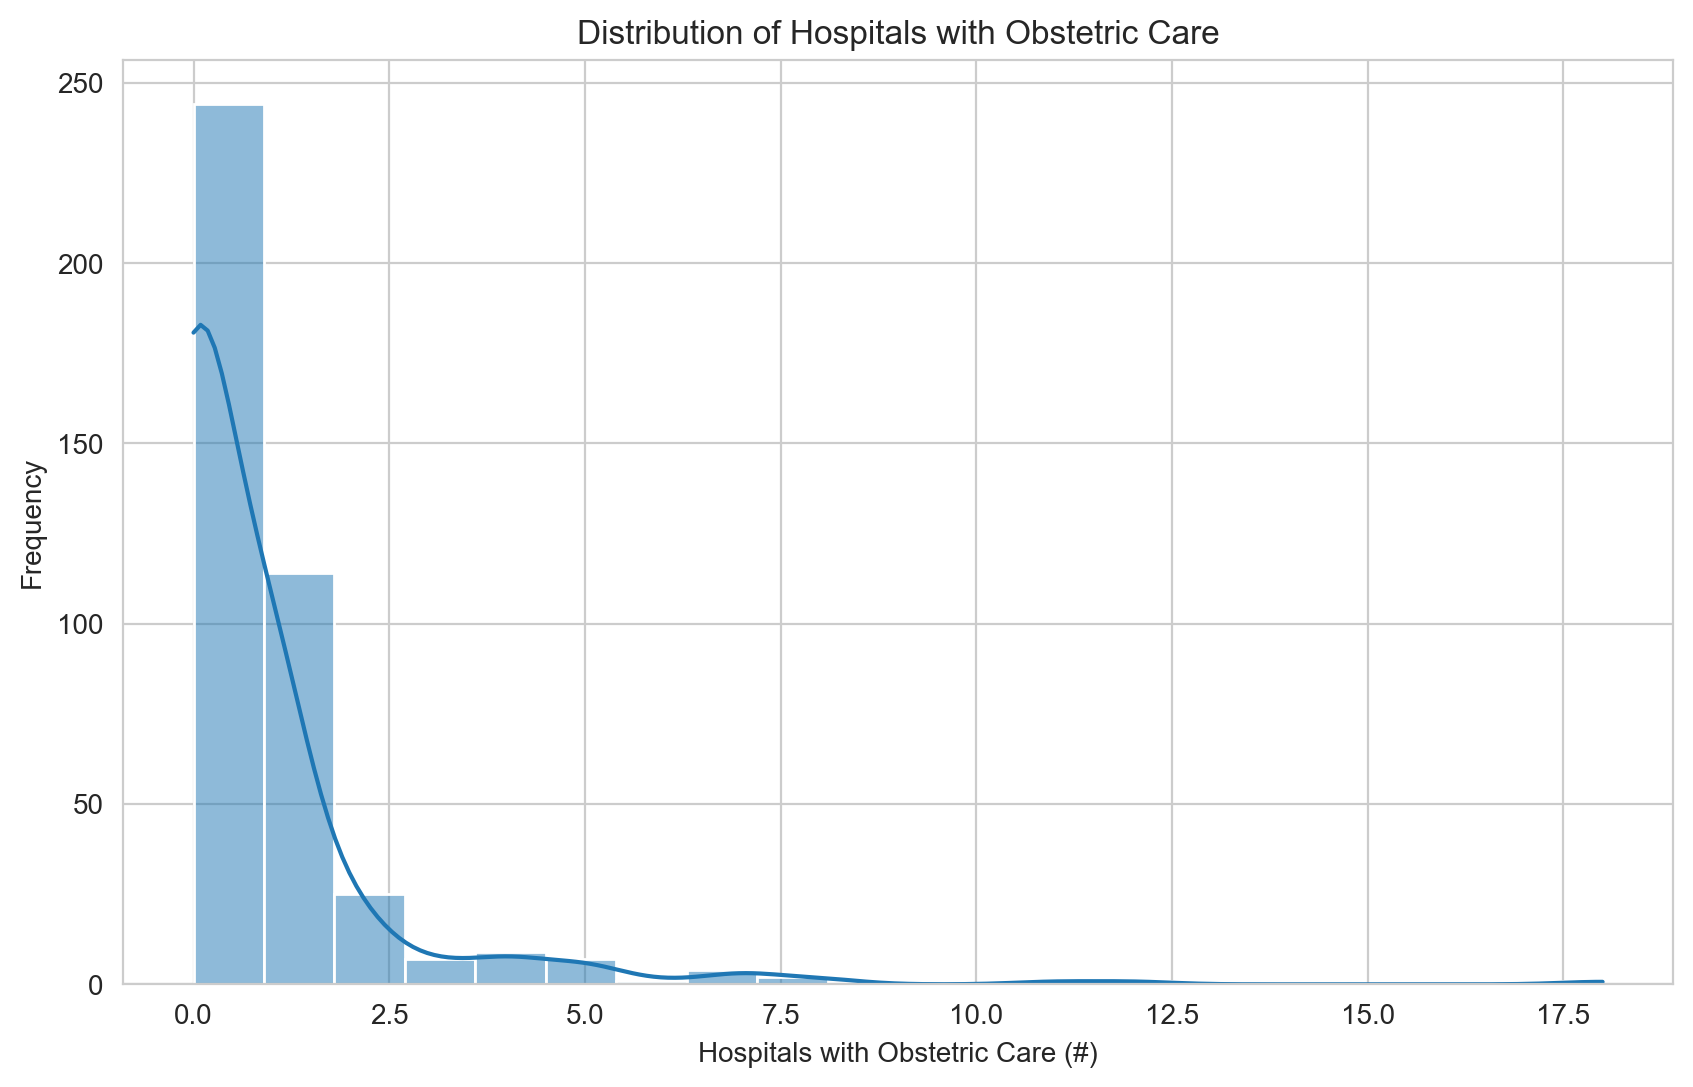

In [16]:
# create a histogram of the 'Hospitals with Obstetric Care (#)' column
plt.figure(figsize=(10, 6))
sns.histplot(df['Hospitals with Obstetric Care (#)'], bins=20, kde=True)
plt.title('Distribution of Hospitals with Obstetric Care')
plt.xlabel('Hospitals with Obstetric Care (#)')
plt.ylabel('Frequency')
plt.show()

<h5 style="color: orange;"> 

This histogram represents the number count of hospitals within a county or reigion which offer obstetric care, necessary to support pregnant individuals.   

Most areas have zero or one hospital with obstetric services, and very few have greater than two or three. The tail of the line does extend far to the right, representing that there are very low numbers of counties with significantly more hospitals. 

Overall, this graph represents that obstetric care is concentrated, as the majority of areas have very limited options. This leads to poor maternal and infant health outcomes, especially in emergent or rural settings.</h5>

/var/folders/q3/68365r8n1cv71829983lgcl00000gn/T/ipykernel_10947/2443179233.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')


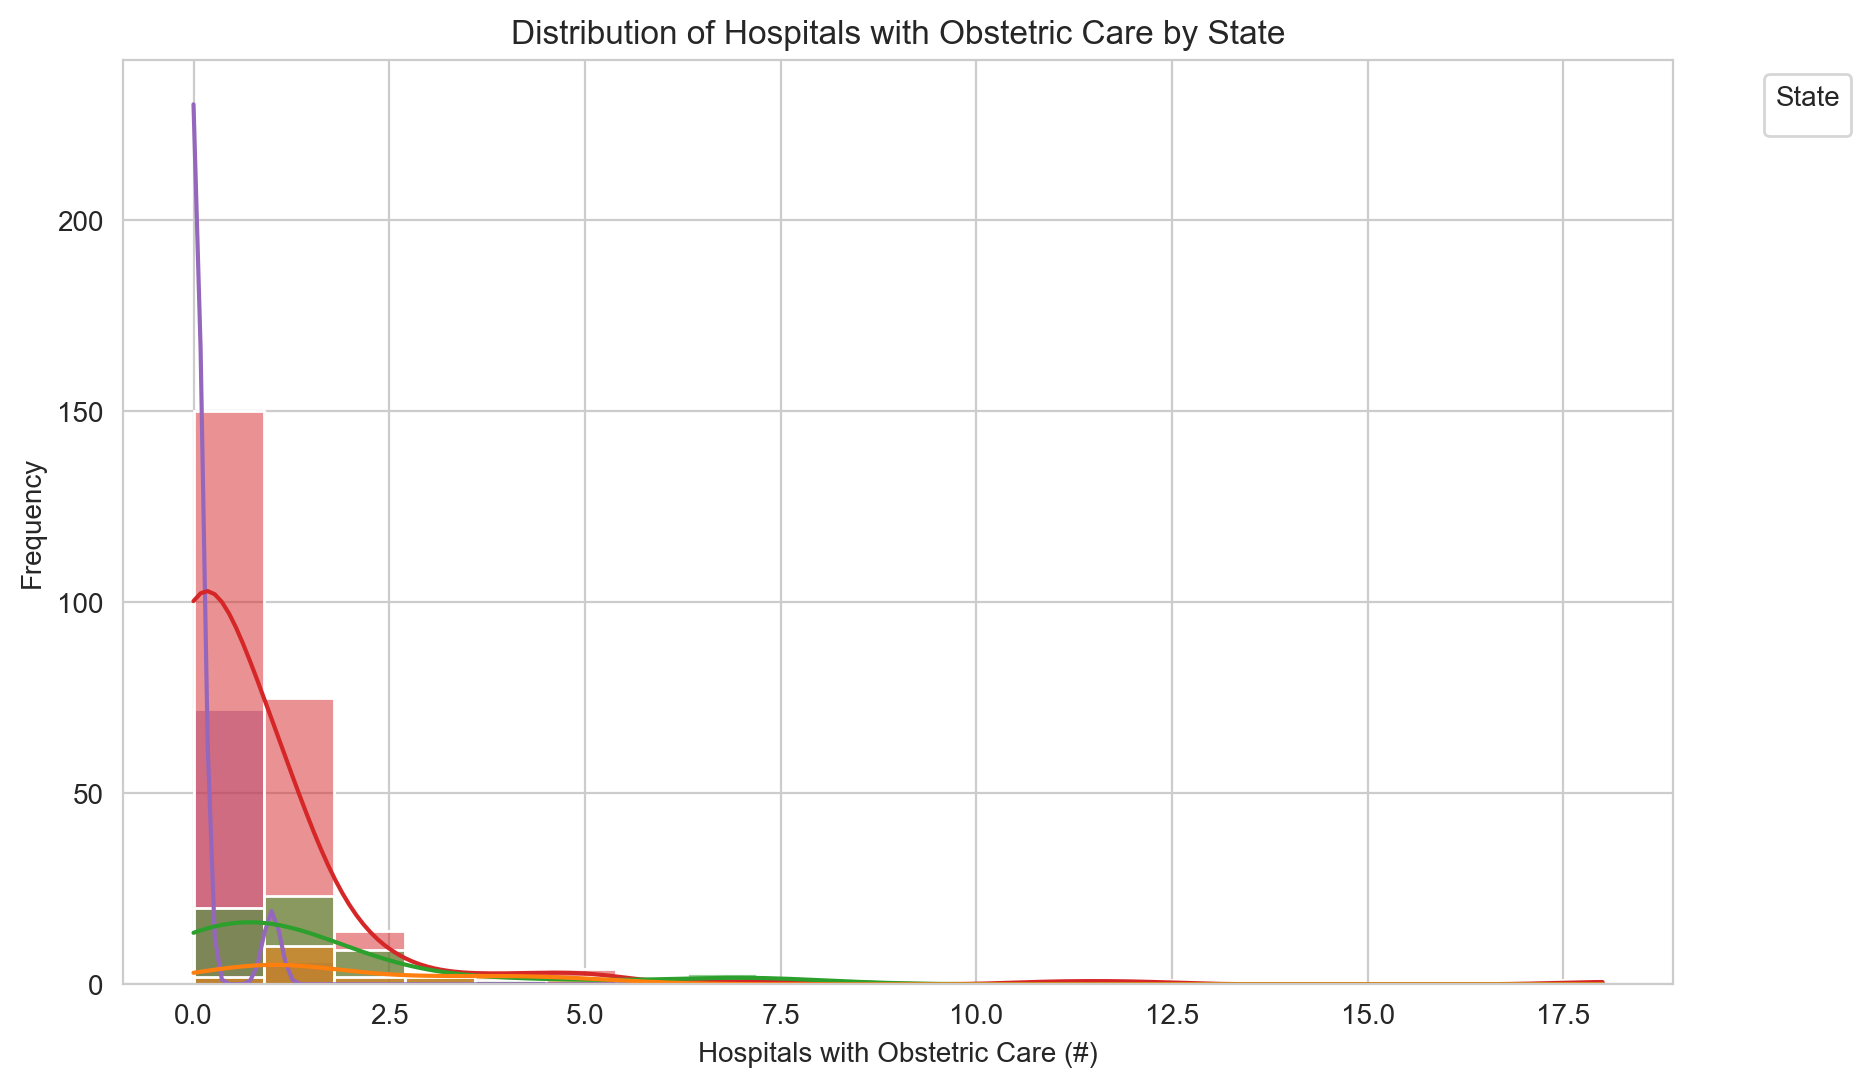

In [17]:
# create a histogram of the 'hospitals with obstetric care' column separated by state
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Hospitals with Obstetric Care (#)', hue='State', bins=20, kde=True)
plt.title('Distribution of Hospitals with Obstetric Care by State')
plt.xlabel('Hospitals with Obstetric Care (#)')
plt.ylabel('Frequency')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<h5 style="color: orange;">This graph breaks apart the data above by state, using overlapping histograms. The key takeaway is that no matter the state, it is uncommon for a county to have multiple obstetric hospitals.  </h5

*<h4 style="color: #ff5ab2;">OB-GYN Provider Rate (per 100,000)</h1>*

In [18]:
#can you convert ob-gyn provider rate to numeric and get summary statistics
df['OB-GYN Provider Rate (per 100,000)'] = pd.to_numeric(df['OB-GYN Provider Rate (per 100,000)'], errors='coerce')
df['OB-GYN Provider Rate (per 100,000)'].describe()

count    416.000000
mean      10.607212
std       14.433008
min        0.000000
25%        0.000000
50%        5.250000
75%       17.625000
max       87.800000
Name: OB-GYN Provider Rate (per 100,000), dtype: float64

<h5 style="color: orange;"> 
These summary statistics of the OB-GYN Provider Rate (per 100,000 individuals) demonstrate that the mean is 10.6 providers per 100,000 inidivuals. The minimum is zero providers, or no OB-GYNs in that county at all, and the maximum is 87.8 within one county area. 

The 25th percentile is 0, meaning that at least 25% of recorded counties have no OB-GYNs. Only the top 25% of counties have more than 17.6 providers per 100,000 people. </h5>

In [19]:
#calculate this separated by state
df_grouped_obgyn = df.groupby('State')['OB-GYN Provider Rate (per 100,000)'].describe().reset_index()
df_grouped_obgyn.columns = ['State', 'count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']
df_grouped_obgyn = df_grouped_obgyn.sort_values(by='mean', ascending=False)
df_grouped_obgyn

,State,count,mean,std,min,25%,50%,75%,max
0,District of Columbia,1.0,60.000000,NaN,60.0,60.000,60.00,60.000,60.0
1,New Jersey,21.0,23.214286,13.969656,4.1,11.400,19.00,33.300,48.1
2,New York,62.0,17.064516,15.881695,0.0,6.475,13.65,22.325,87.8
3,Puerto Rico,78.0,13.406410,18.674911,0.0,0.000,7.20,20.000,84.2
4,Texas,254.0,6.934646,10.502564,0.0,0.000,0.00,12.800,59.1


<h5 style="color: orange;"> 
The data seperated by state reveals the county counts per state, and then dives into the mean number of providers per 100,000 individuals. The greatest mean is the District of Columbia, and the lowest mean rate is Texas with 6.93 providers per 100,000 people. 

An interesting data point is the minimum of 4.1 providers in New Jersey, where the other states have at least one county within them that has zero providers. </h5>

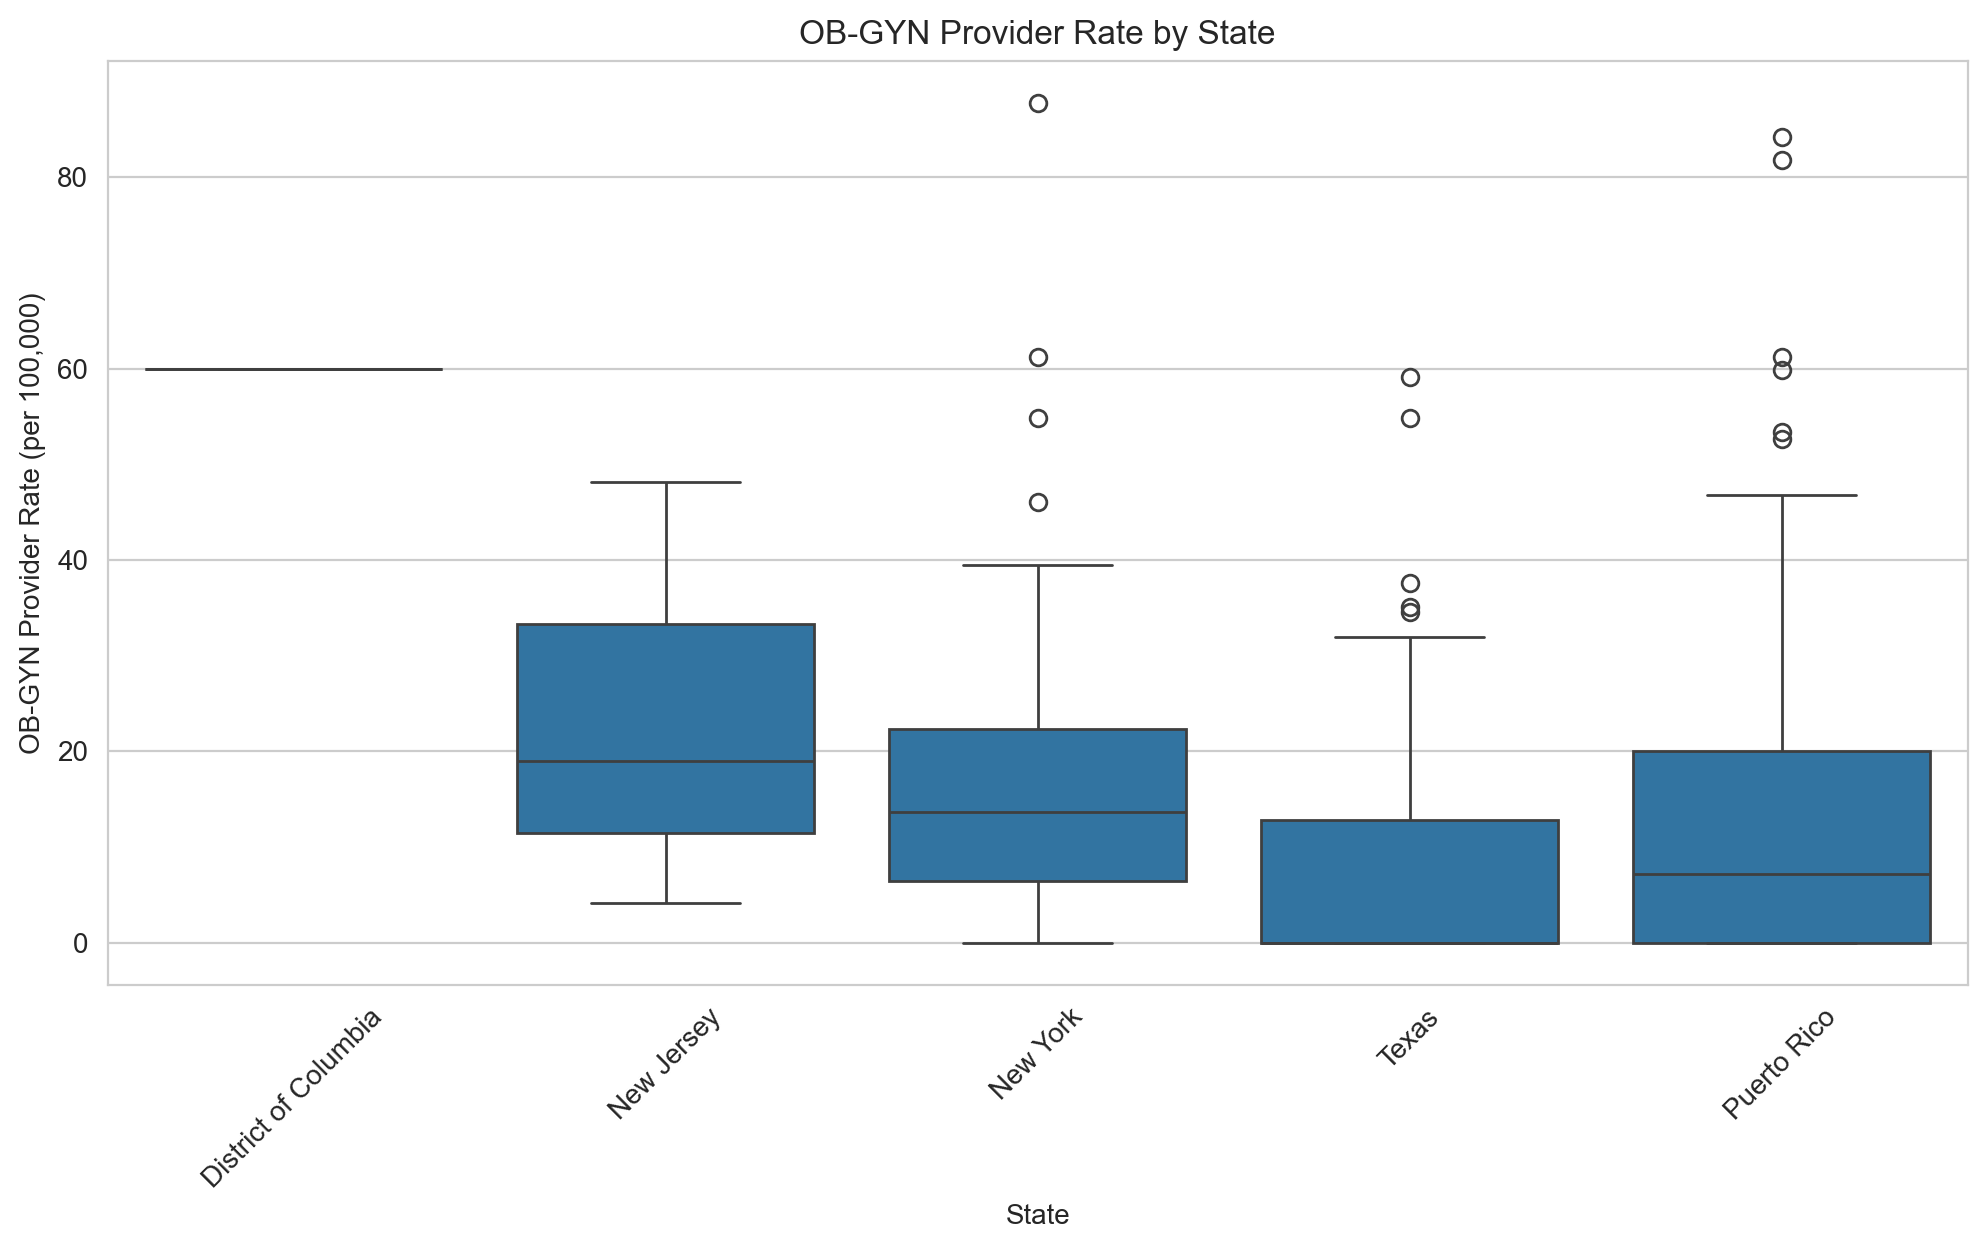

In [20]:
#create a box plot of the 'OB-GYN Provider Rate (per 100,000)' column divided by state
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='State', y='OB-GYN Provider Rate (per 100,000)')
plt.title('OB-GYN Provider Rate by State')
plt.xlabel('State')
plt.ylabel('OB-GYN Provider Rate (per 100,000)')
plt.xticks(rotation=45)
plt.show()


<h5 style="color: orange;"> 

This boxplot demonstrates a comparison of OB-GYN Provider Rate per 100,000 people across the five areas of interest. 

The District of Columbia has a single value because it has only one collection point, yet it has the greatest rate of 60 providers per 100,000 people. New Jersey has the greatest median and a wide spread. Puerto Rico has the lowest median. New York, Texas, and Puerto Rico have potential upper outlier values. 

Overall, there is a inbalnce in provider access demonstrated in this graph. Low provider access makes it more difficult for pregnant individuals to see providers throughout their pregnancy. This can in turn impact birth outcomes. </h5>


*<h4 style="color: #ff5ab2;">Infant Mortality Rate (per 1,000) 2020 - 2022</h1>*

In [21]:
# Convert the 'Infant Mortality Rate (per 1,000) 2020-2022' column to numeric
df['Infant Mortality Rate (per 1,000) 2020-2022'] = pd.to_numeric(df['Infant Mortality Rate (per 1,000) 2020-2022'], errors='coerce')

#calculate infant mortality rate summary statistics
df['Infant Mortality Rate (per 1,000) 2020-2022'].describe()

count    386.000000
mean       5.947409
std        1.676547
min        2.500000
25%        4.900000
50%        5.700000
75%        6.900000
max       12.100000
Name: Infant Mortality Rate (per 1,000) 2020-2022, dtype: float64

<h5 style="color: orange;"> 

There are 386 counties or regions included in this data variable, with an average of 5.95 infant deaths per 1,000 live births across all of the states of interest. 

With a standard deviation value of 1.677, there is variation between the recorded counties. 

The maxiumum infant mortality rate is 12.1 deaths per 1,000 live births. </h5>

In [22]:
# can you make this into a table
df_grouped = df.groupby('State')['Infant Mortality Rate (per 1,000) 2020-2022'].mean().reset_index()
df_grouped.columns = ['State', 'Infant Mortality Rate (per 1,000) 2020-2022']
df_grouped = df_grouped.sort_values(by='Infant Mortality Rate (per 1,000) 2020-2022', ascending=False)
df_grouped

,State,"Infant Mortality Rate (per 1,000) 2020-2022"
3,Puerto Rico,7.452055
4,Texas,5.865939
0,District of Columbia,5.300000
2,New York,5.082258
1,New Jersey,4.190476


<h5 style="color: orange;"> 

The average number of infant deaths per 1,000 live births divided by state. 

Puerto Rico has the greatest average, while New Jersey has the lowest. The national average is 5.6. Two areas, Puerto Rico and Texas, have average Infant Mortality Rates higher than this value. </h5>

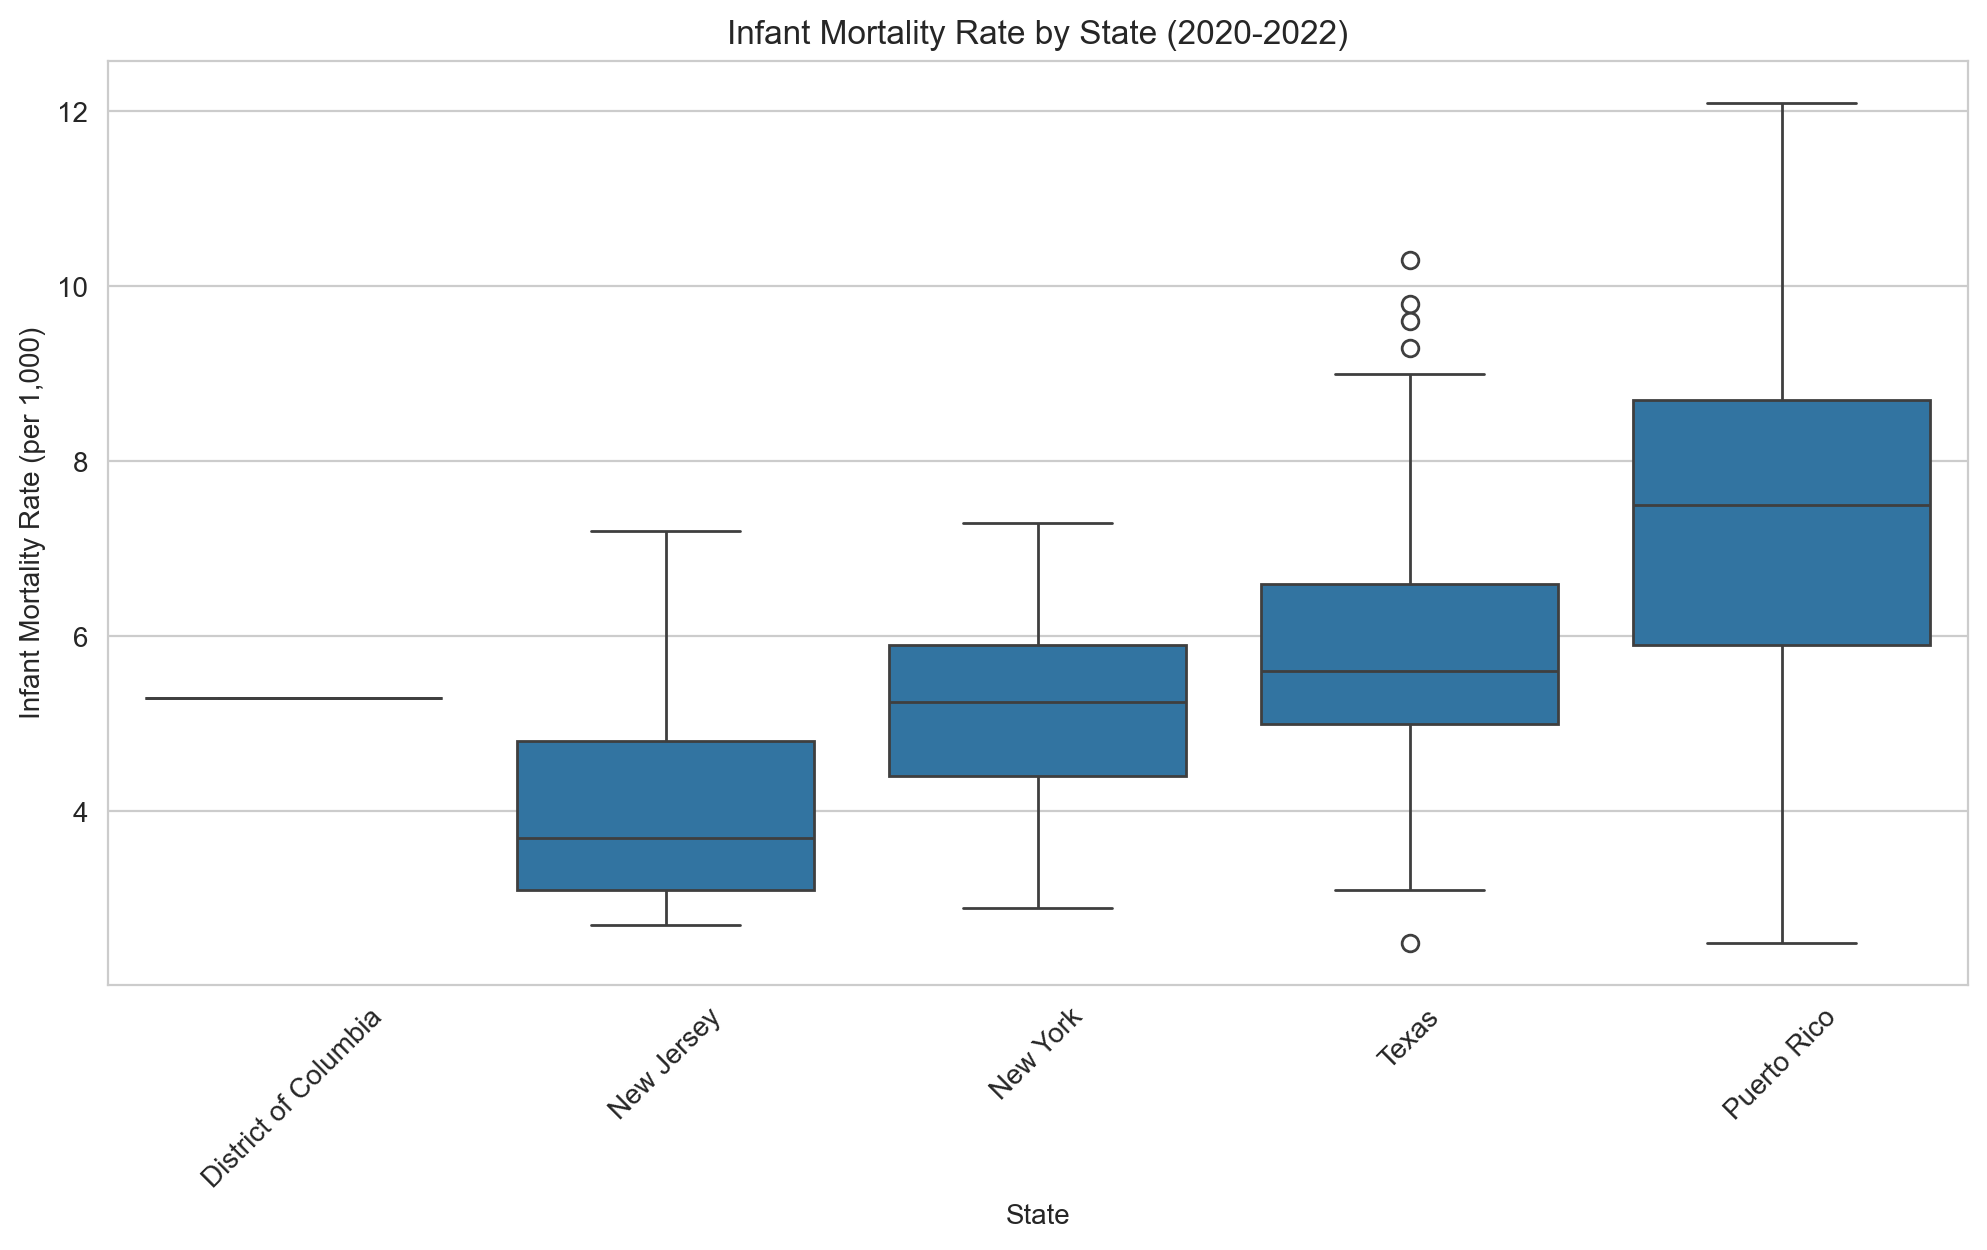

In [23]:
#create a box plot of the infant mortality rate by state
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='State', y='Infant Mortality Rate (per 1,000) 2020-2022')
plt.title('Infant Mortality Rate by State (2020-2022)')
plt.xlabel('State')
plt.ylabel('Infant Mortality Rate (per 1,000)')
plt.xticks(rotation=45)
plt.show()


<h5 style="color: orange;"> 

This boxplot describes the infant mortality rate per 1,000 live births between the years 2020 and 2022 divided by state. 

The highest medians are from Puerto Rico and Texas, and within both of those areas there are recorded mortality rates above 10 per 1,000 live births. 

D.C. and New Jersey have lower rates, however New Jersey has a wide spread of data. 

Suspected outlier data points in Texas may point to certain counties facing more barriers to care and potential health concerns than other counties within the same state. The same is true for the data from Puerto Rico, where great variety can be found in the infant mortality rate. These patterns may be tied to access to OB-GYNs and hospitals, as just mentioned. </h5>

*<h4 style="color: #ff5ab2;">Low Birth Weight (%), 2020-2022</h1>*

In [24]:
#calculate summary statistics for the low birth weight rate
df['Low Birth Weight (%) 2020-2022'] = pd.to_numeric(df['Low Birth Weight (%) 2020-2022'], errors='coerce')
df['Low Birth Weight (%) 2020-2022'].describe()

count    416.000000
mean       8.676683
std        1.305894
min        4.500000
25%        7.800000
50%        8.600000
75%        9.300000
max       13.100000
Name: Low Birth Weight (%) 2020-2022, dtype: float64

<h5 style="color: orange;"> 

There were 416 counties and regions included in the data for this variable, Low Birth Weight %. 

The mean percentage was 8.68% of babies born with low birth weight across the states of interest. The maximum value is 13.1% of babies are born with low birth weight. </h5>

In [25]:
#calculate low birth weight rate summary statistics separated by state
df_grouped_low_birth_weight = df.groupby('State')['Low Birth Weight (%) 2020-2022'].describe().reset_index()
df_grouped_low_birth_weight.columns = ['State', 'count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']
df_grouped_low_birth_weight = df_grouped_low_birth_weight.sort_values(by='mean', ascending=False)
df_grouped_low_birth_weight

,State,count,mean,std,min,25%,50%,75%,max
3,Puerto Rico,78.0,10.520513,0.975460,8.8,9.825,10.6,11.00,13.1
0,District of Columbia,1.0,9.600000,NaN,9.6,9.600,9.6,9.60,9.6
4,Texas,254.0,8.415748,0.865174,6.3,7.800,8.4,9.00,11.3
1,New Jersey,21.0,7.757143,1.026923,5.9,7.200,7.9,8.40,9.4
2,New York,62.0,7.722581,1.043861,4.5,7.300,7.7,8.35,10.6


<h5 style="color: orange;"> 

When this data is divided by states and territories, Puerto Rico and D.C. have the highest proportions of low birth weight births, suggesting inequities in maternal and prenatal care, with values of 10.52% and 9.6% respectively. 

The maximum percentage is greatest in Puerto Rico, 13.1%, and Texas, 11.3%. </h5>

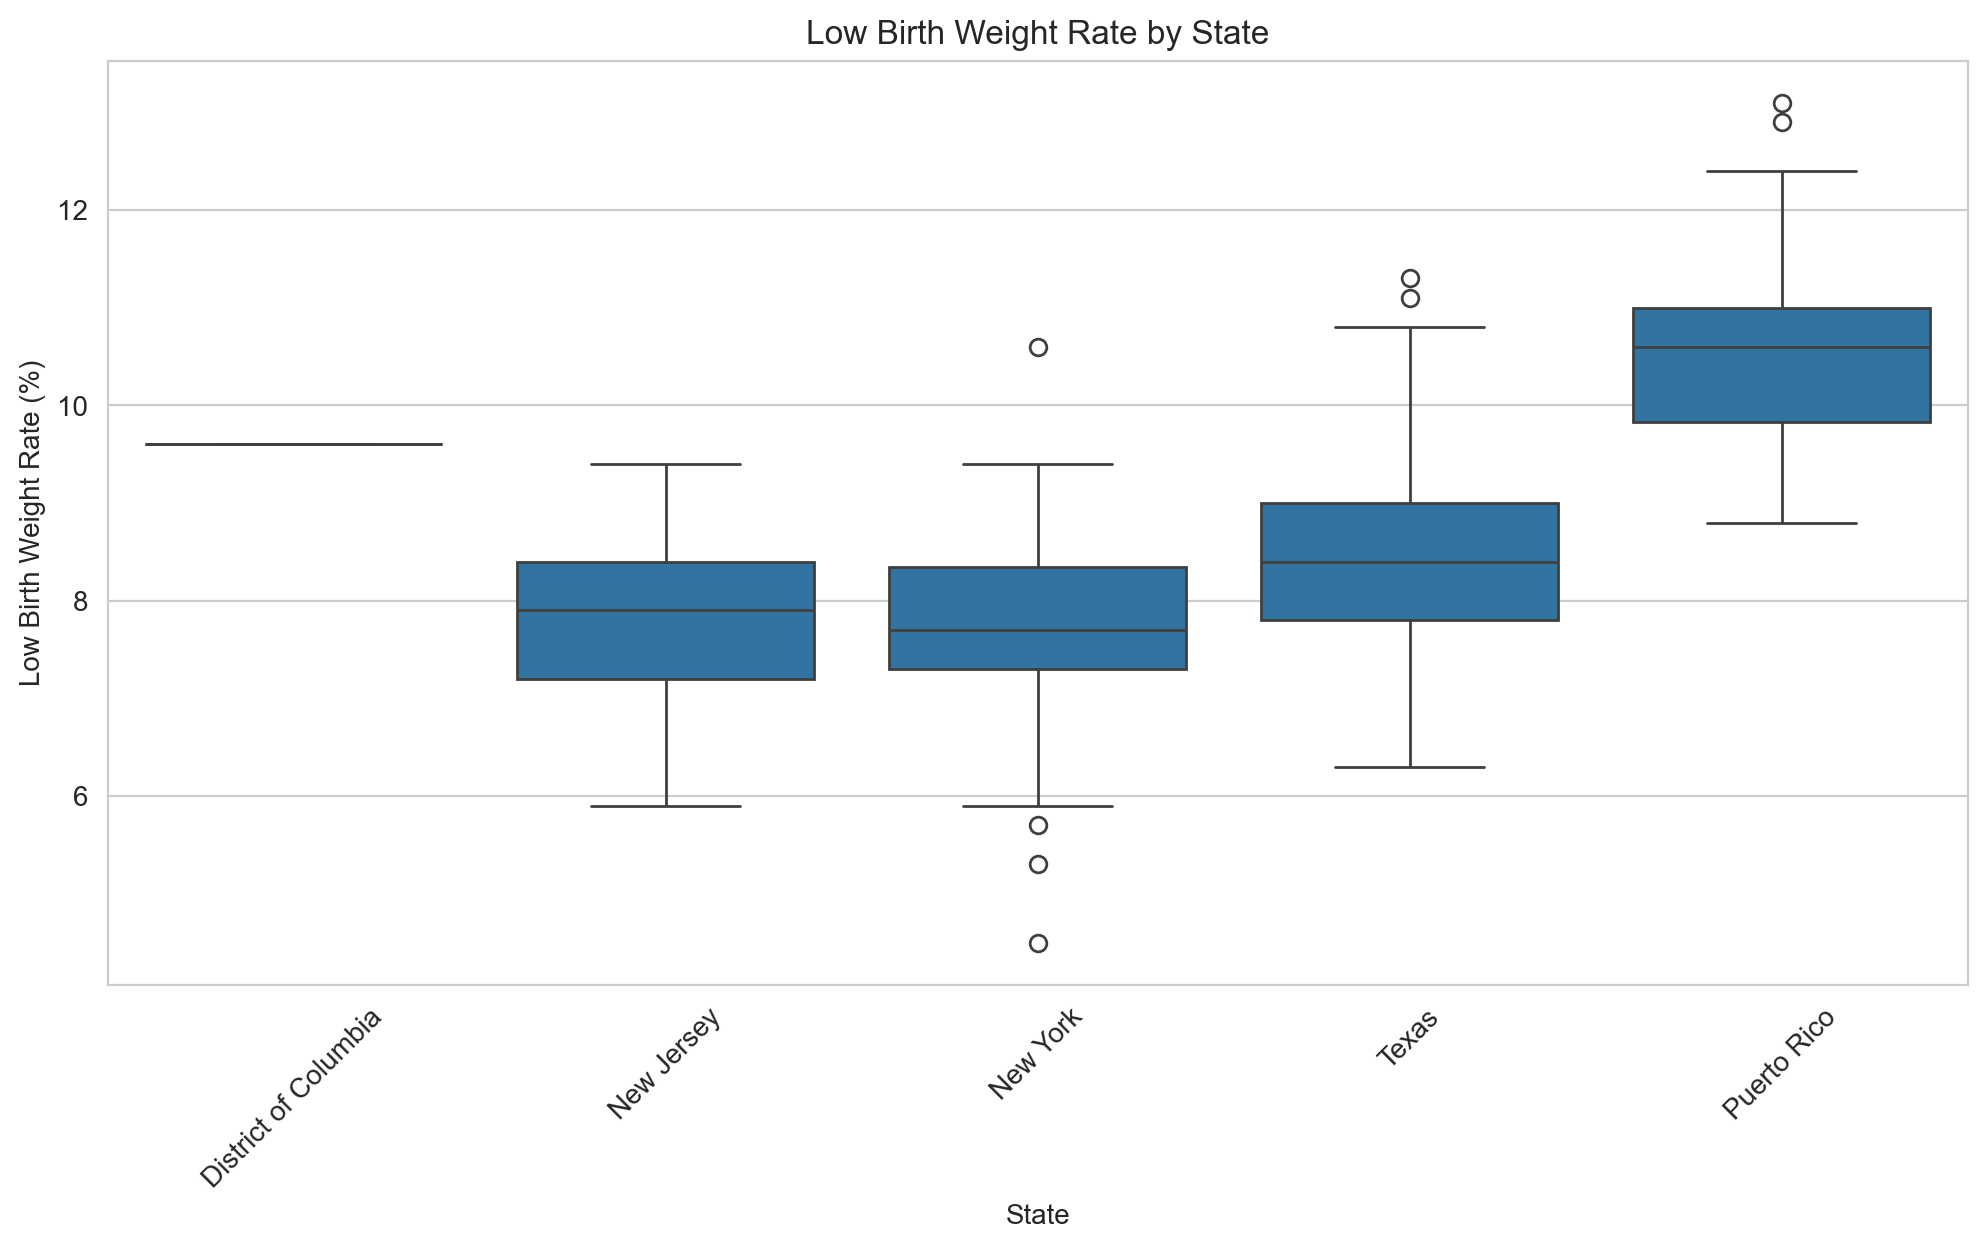

In [26]:
#create a boxplot of the low birth weight rate separated by state
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='State', y='Low Birth Weight (%) 2020-2022')
plt.title('Low Birth Weight Rate by State')
plt.xlabel('State')
plt.ylabel('Low Birth Weight Rate (%)')
plt.xticks(rotation=45)
plt.show()

<h5 style="color: orange;"> 

This boxplot demonstrates the percentage of babies born with low birth weight, below 5.5 pounds, across different states.

The greatest median rate is from Puerto Rico, at around 10.6%. Puerto Rico also has the widest spread of percentages, with the majority of reigions exceeding 10-12%.

The data from Texas is also variable, with the second greatest median value. 

New Jersey and New York both have mediam values of around 8%, which is the national average. 

Overall, low birth rate is more common in Puerto Rico and Texas, which could reflect disparities in areas also focused on in this report. Low birth rate complicates health outcomes for newborns, and reflects on the mother's health during the pregnancy and potential birth complications for the mother as well. </h5>


*<h4 style="color: #ff5ab2;">Preterm Births (%), 2020-2022</h1>*

In [27]:
#calculate preterm births (%) 2020-2022 summary statistics
df['Preterm Births (%) 2020-2022'] = pd.to_numeric(df['Preterm Births (%) 2020-2022'], errors='coerce')
df['Preterm Births (%) 2020-2022'].describe()

count    416.000000
mean      10.950721
std        1.559580
min        6.400000
25%        9.900000
50%       10.850000
75%       11.900000
max       15.400000
Name: Preterm Births (%) 2020-2022, dtype: float64

<h5 style="color: orange;"> 

There are 416 regions or counties included in the data for the variable, Preterm Births (%).

The mean is 10.95% of babies are born preterm across the areas of interest. This is greater than the national average of 8.7% of births being preterm.

With a maximum value of 15.4% of babies born preterm, the selected areas reach up to almost double the national average, exposing an important need for additional maternal and prenatal care. </h5>

In [28]:
#Calculate preterm birth rate summary statistics separated by state
df_grouped_preterm_births = df.groupby('State')['Preterm Births (%) 2020-2022'].describe().reset_index()
df_grouped_preterm_births.columns = ['State', 'count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']
df_grouped_preterm_births = df_grouped_preterm_births.sort_values(by='mean', ascending=False)
df_grouped_preterm_births

,State,count,mean,std,min,25%,50%,75%,max
3,Puerto Rico,78.0,12.152564,1.423524,10.2,10.900,11.85,13.375,15.4
4,Texas,254.0,11.126378,1.286926,7.2,10.100,11.00,12.000,14.7
0,District of Columbia,1.0,10.000000,NaN,10.0,10.000,10.00,10.000,10.0
1,New Jersey,21.0,9.347619,1.074067,7.2,8.600,9.40,9.900,11.5
2,New York,62.0,9.277419,1.010668,6.4,8.725,9.30,10.075,11.1


<h5 style="color: orange;"> 

When this data is divided by area, Puerto Rico has the greatest mean value of preterm births, 12.15%. Puerto Rico also recorded the highest value of the dataset with 15.5% of births preterm in a region. Texas has a similarly concerning maximum value of 14.7%. </h5>

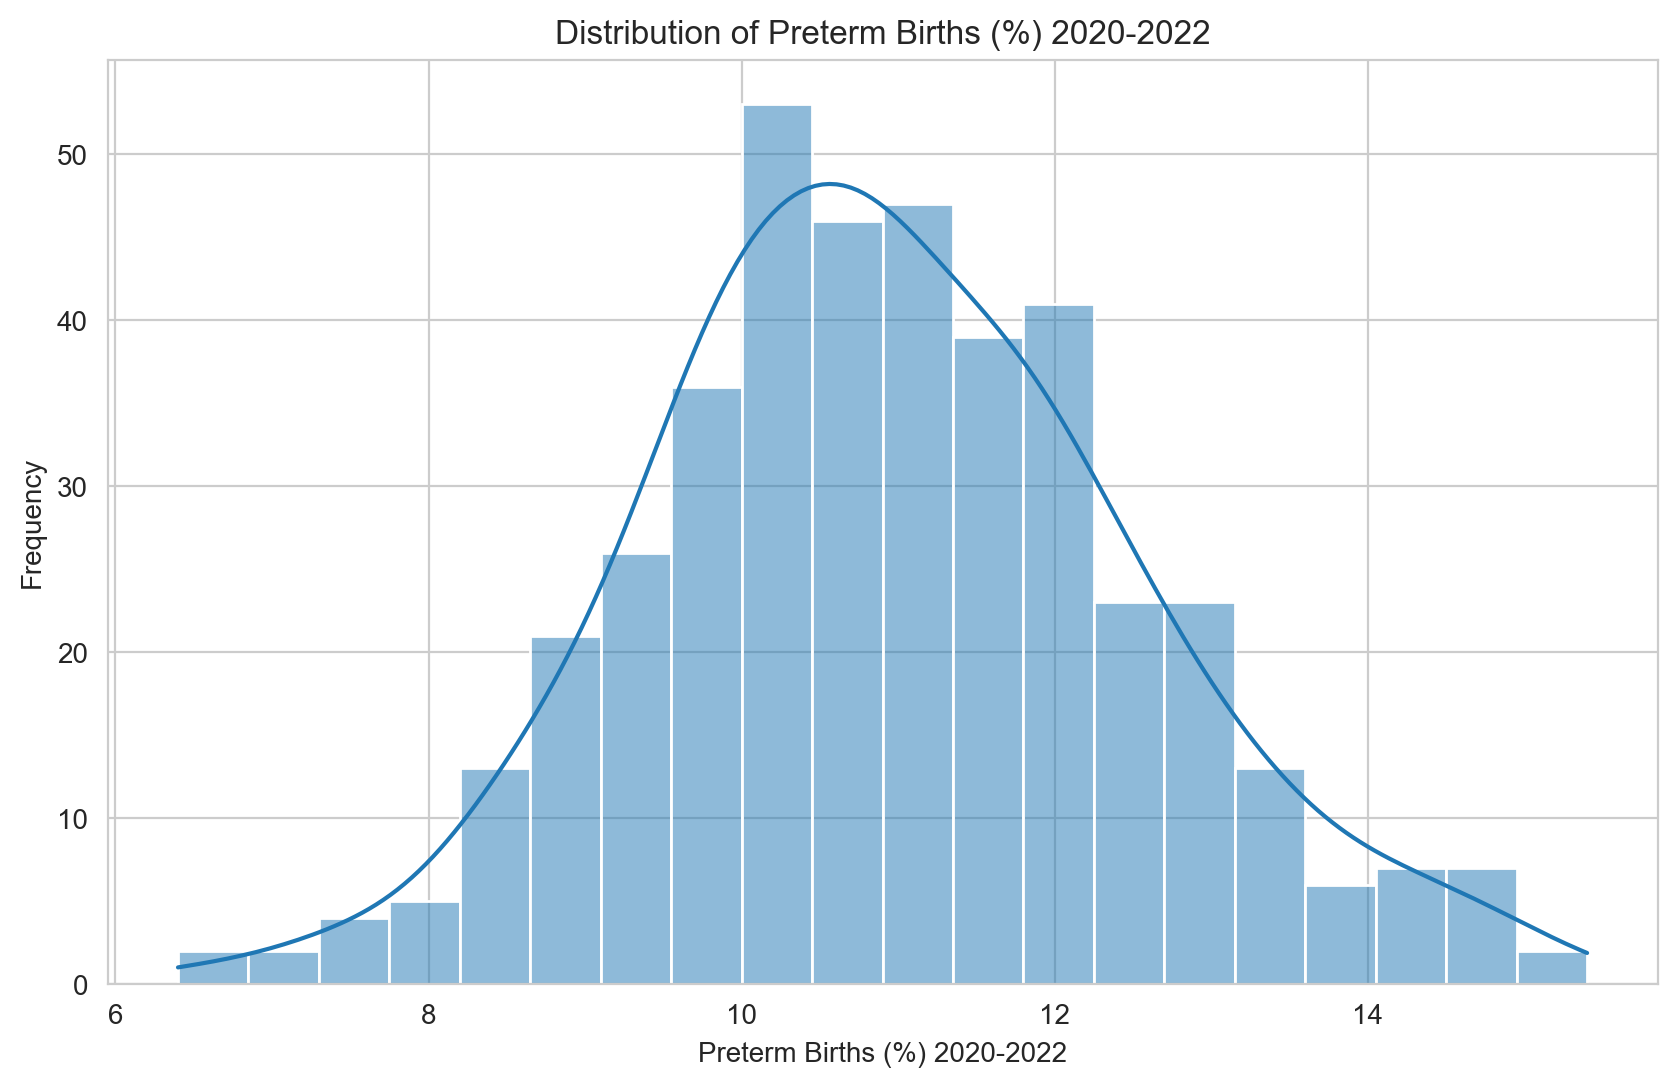

In [29]:
#show the distribution of preterm births
plt.figure(figsize=(10, 6))
sns.histplot(df['Preterm Births (%) 2020-2022'], bins=20, kde=True)
plt.title('Distribution of Preterm Births (%) 2020-2022')
plt.xlabel('Preterm Births (%) 2020-2022')
plt.ylabel('Frequency')
plt.show()

<h5 style="color: orange;"> 

This histogram details the percentage of births which occured preterm, or before 37 weeks gestation. 

The majority of counties, nondiscriminant of which state they are from, fall between preterm rates of 9% and 12%. This distribution is generally symmetrical, indicating that though there are counties with high percentage values of preterm births above 12%, there are also only a few counties which have reduced the percentage of preterm births below 8%.

The national average of 10% of births recorded as preterm indicates a national need for improved focus on maternal health. </h5>

/var/folders/q3/68365r8n1cv71829983lgcl00000gn/T/ipykernel_10947/2568561826.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')


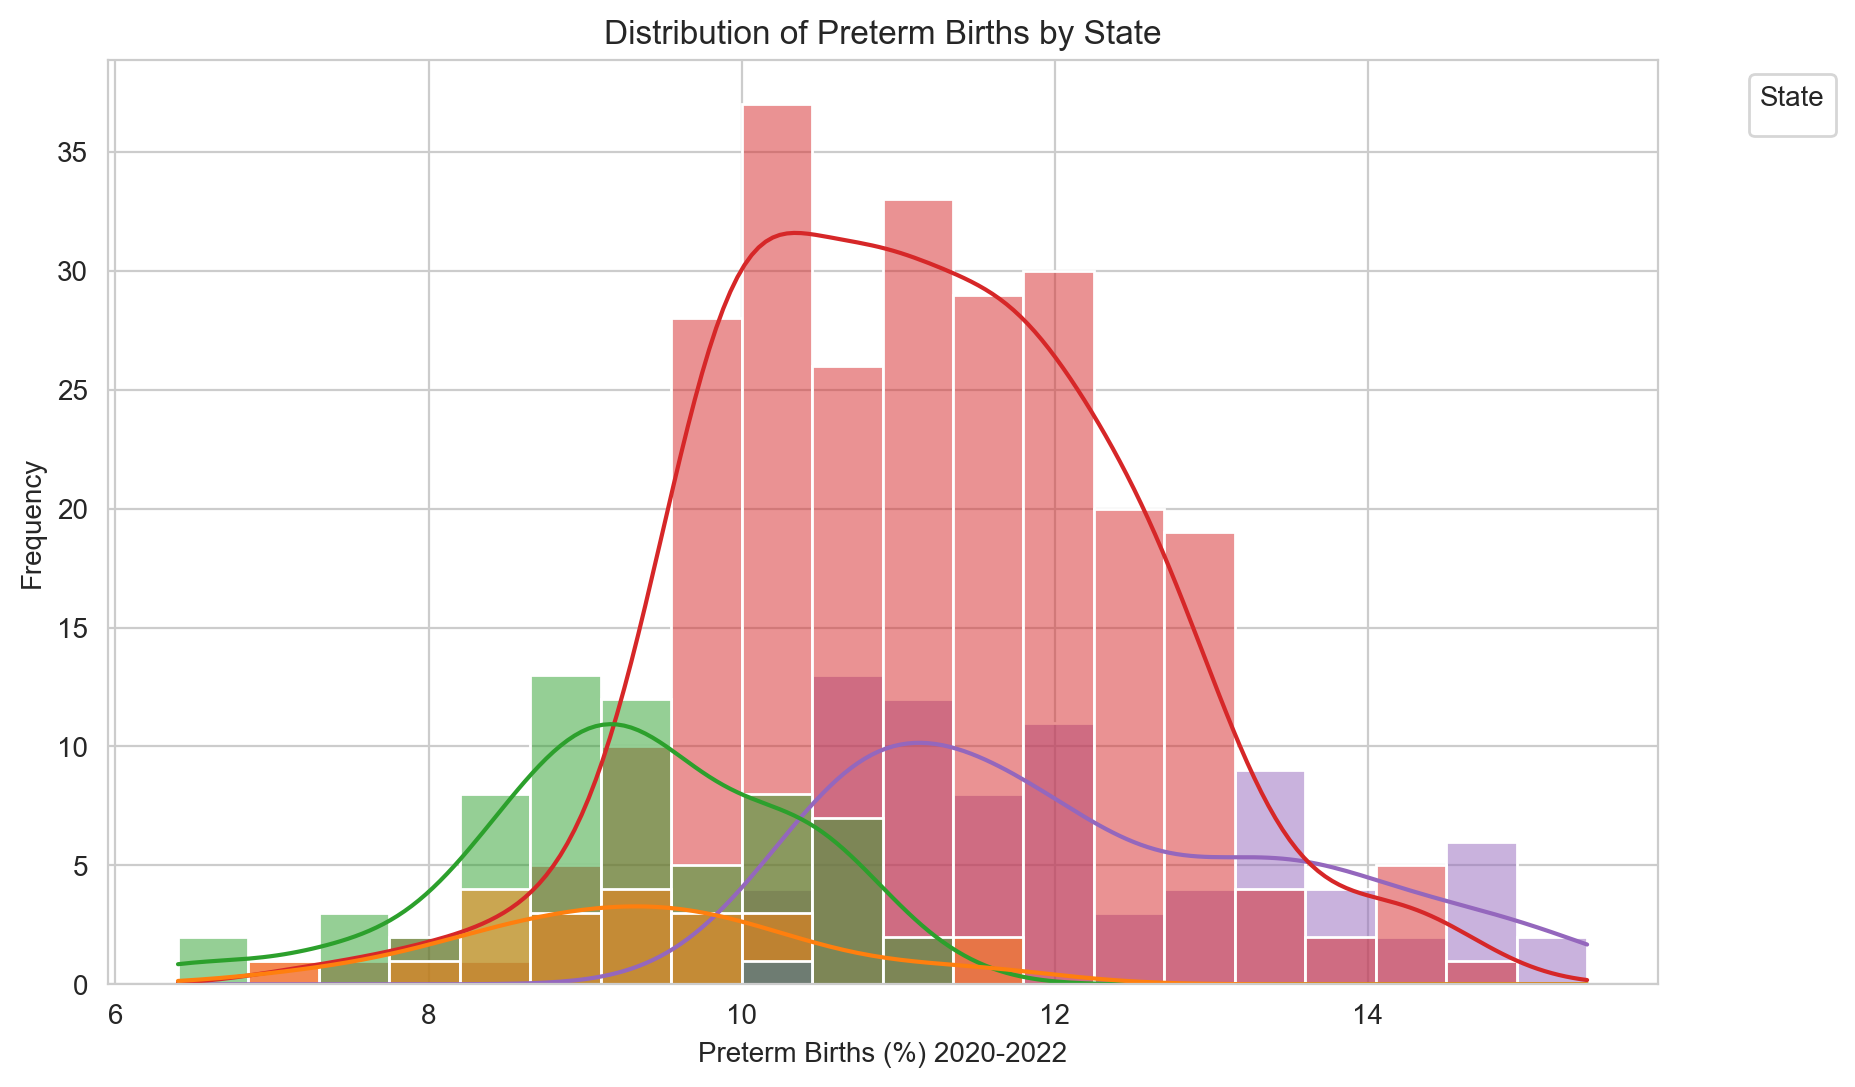

In [30]:
#create the same histogram separated by state
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Preterm Births (%) 2020-2022', hue='State', bins=20, kde=True)
plt.title('Distribution of Preterm Births by State')
plt.xlabel('Preterm Births (%) 2020-2022')
plt.ylabel('Frequency')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<h5 style="color: orange;"> 

This is the same distribution as above but color-coded by state.

Texas has the greatest frequency count of counties with preterm birth rates between 10% and 12%. Puerto Rico has data for preterm birth percentages that skews higher, up to 15%. 

New York and New Jersey typically have lower preterm birth percentages. </h5>

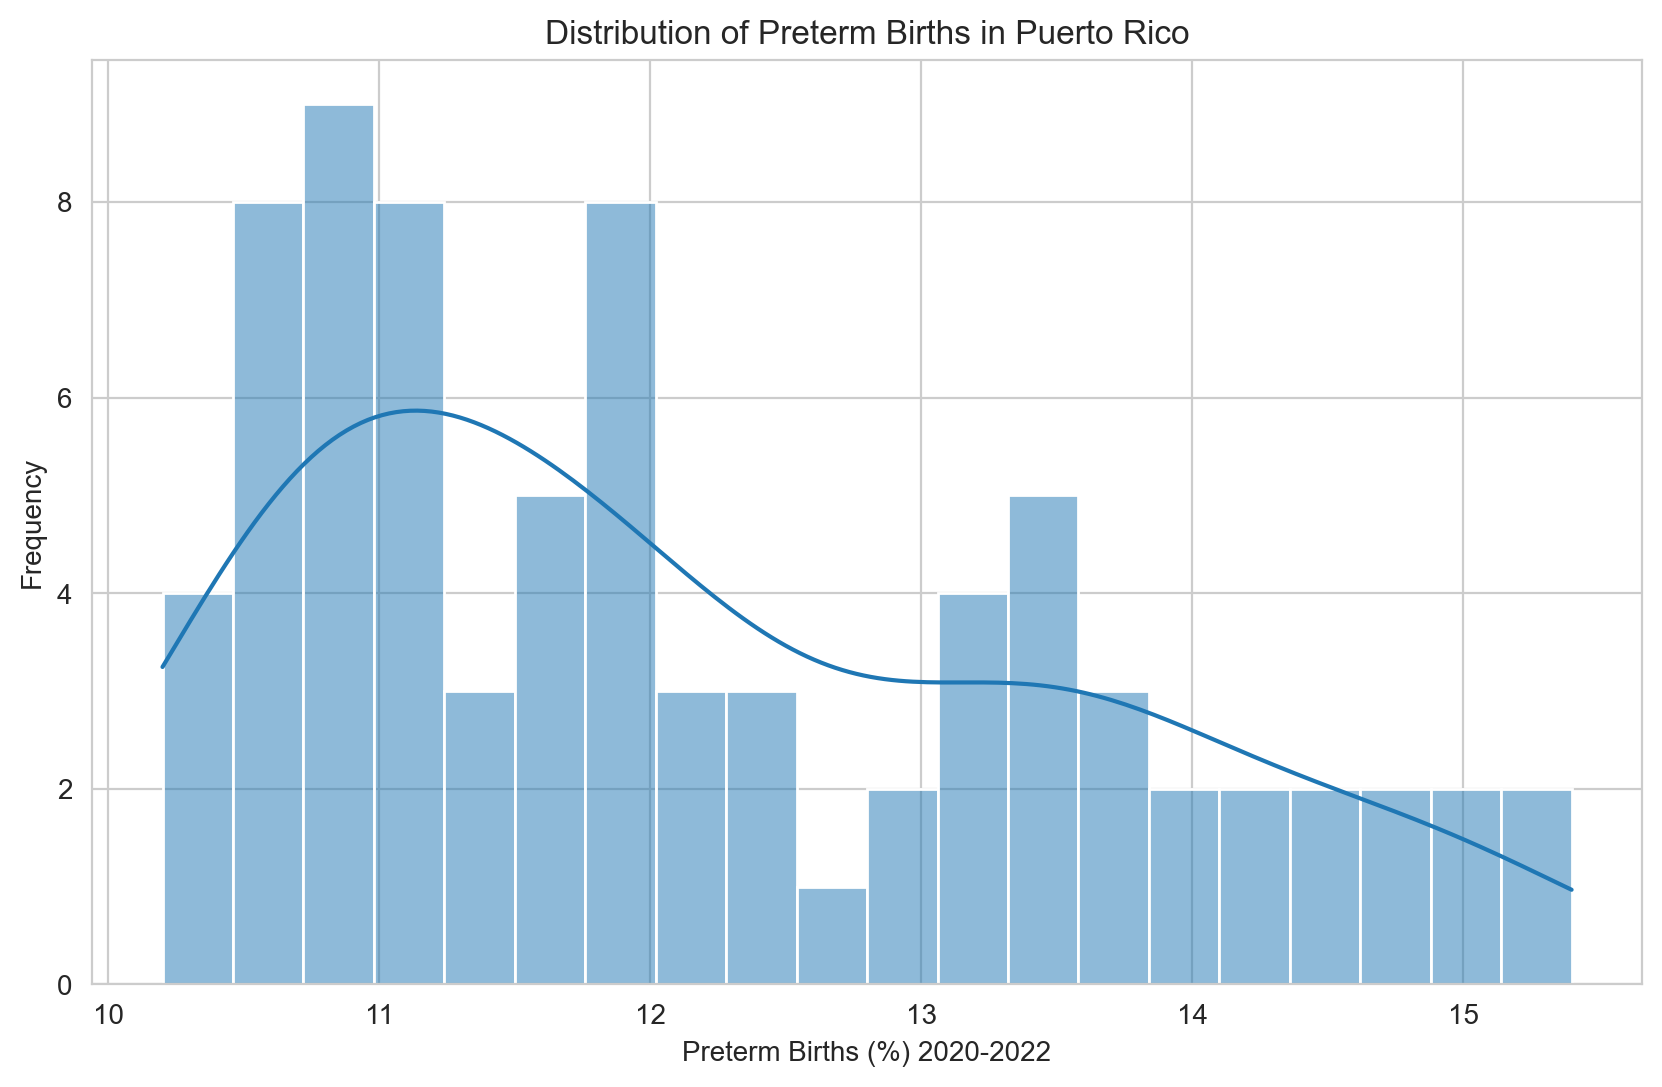

In [31]:
#create a histogram of the preterm birth rate for puertio rico
plt.figure(figsize=(10, 6))
sns.histplot(data=df[df['State'] == 'Puerto Rico'], x='Preterm Births (%) 2020-2022', bins=20, kde=True)
plt.title('Distribution of Preterm Births in Puerto Rico')
plt.xlabel('Preterm Births (%) 2020-2022')
plt.ylabel('Frequency')
plt.show()

*<h4 style="color: #ff5ab2;">Prenatal Care in the 1st Trimester (%), 2020-2022</h1>*

In [32]:
#calculate prenatal care in the 1st trimester (%) 2020-2022 summary statistics
df['Prenatal Care in the 1st Trimester (%) 2020-2022'] = pd.to_numeric(df['Prenatal Care in the 1st Trimester (%) 2020-2022'], errors='coerce')
df['Prenatal Care in the 1st Trimester (%) 2020-2022'].describe()

count    416.000000
mean      74.640144
std        8.366301
min       42.000000
25%       69.800000
50%       74.700000
75%       81.600000
max       89.200000
Name: Prenatal Care in the 1st Trimester (%) 2020-2022, dtype: float64

<h5 style="color: orange;"> 

There are 416 regions or counties included in the dataset for this variable, Prenatal Care in the 1st Trimester (%).

The mean across all areas of interest is 74.64%, although the maximum reaches 89.2%. The minimum percentage of pregnant individuals receiving prenatal care is 42.0%. </h5>

In [33]:
#calculate prenatal care in the 1st trimester rate summary statistics separated by state
df_grouped_prenatal_care = df.groupby('State')['Prenatal Care in the 1st Trimester (%) 2020-2022'].describe().reset_index()
df_grouped_prenatal_care.columns = ['State', 'count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']
df_grouped_prenatal_care = df_grouped_prenatal_care.sort_values(by='mean', ascending=False)
df_grouped_prenatal_care

,State,count,mean,std,min,25%,50%,75%,max
3,Puerto Rico,78.0,83.142308,5.204981,51.8,82.5,84.50,86.000,87.9
2,New York,62.0,80.227419,5.746907,61.5,77.4,81.55,83.975,89.2
1,New Jersey,21.0,77.666667,6.208891,63.5,75.4,77.40,82.900,87.1
0,District of Columbia,1.0,72.000000,NaN,72.0,72.0,72.00,72.000,72.0
4,Texas,254.0,70.425591,6.855754,42.0,67.3,71.50,74.650,83.3


<h5 style="color: orange;"> 

Once divided by area, the greatest mean is recorded from Puerto Rico. There is a 13% difference between the greatest mean and the lowest. </h5>

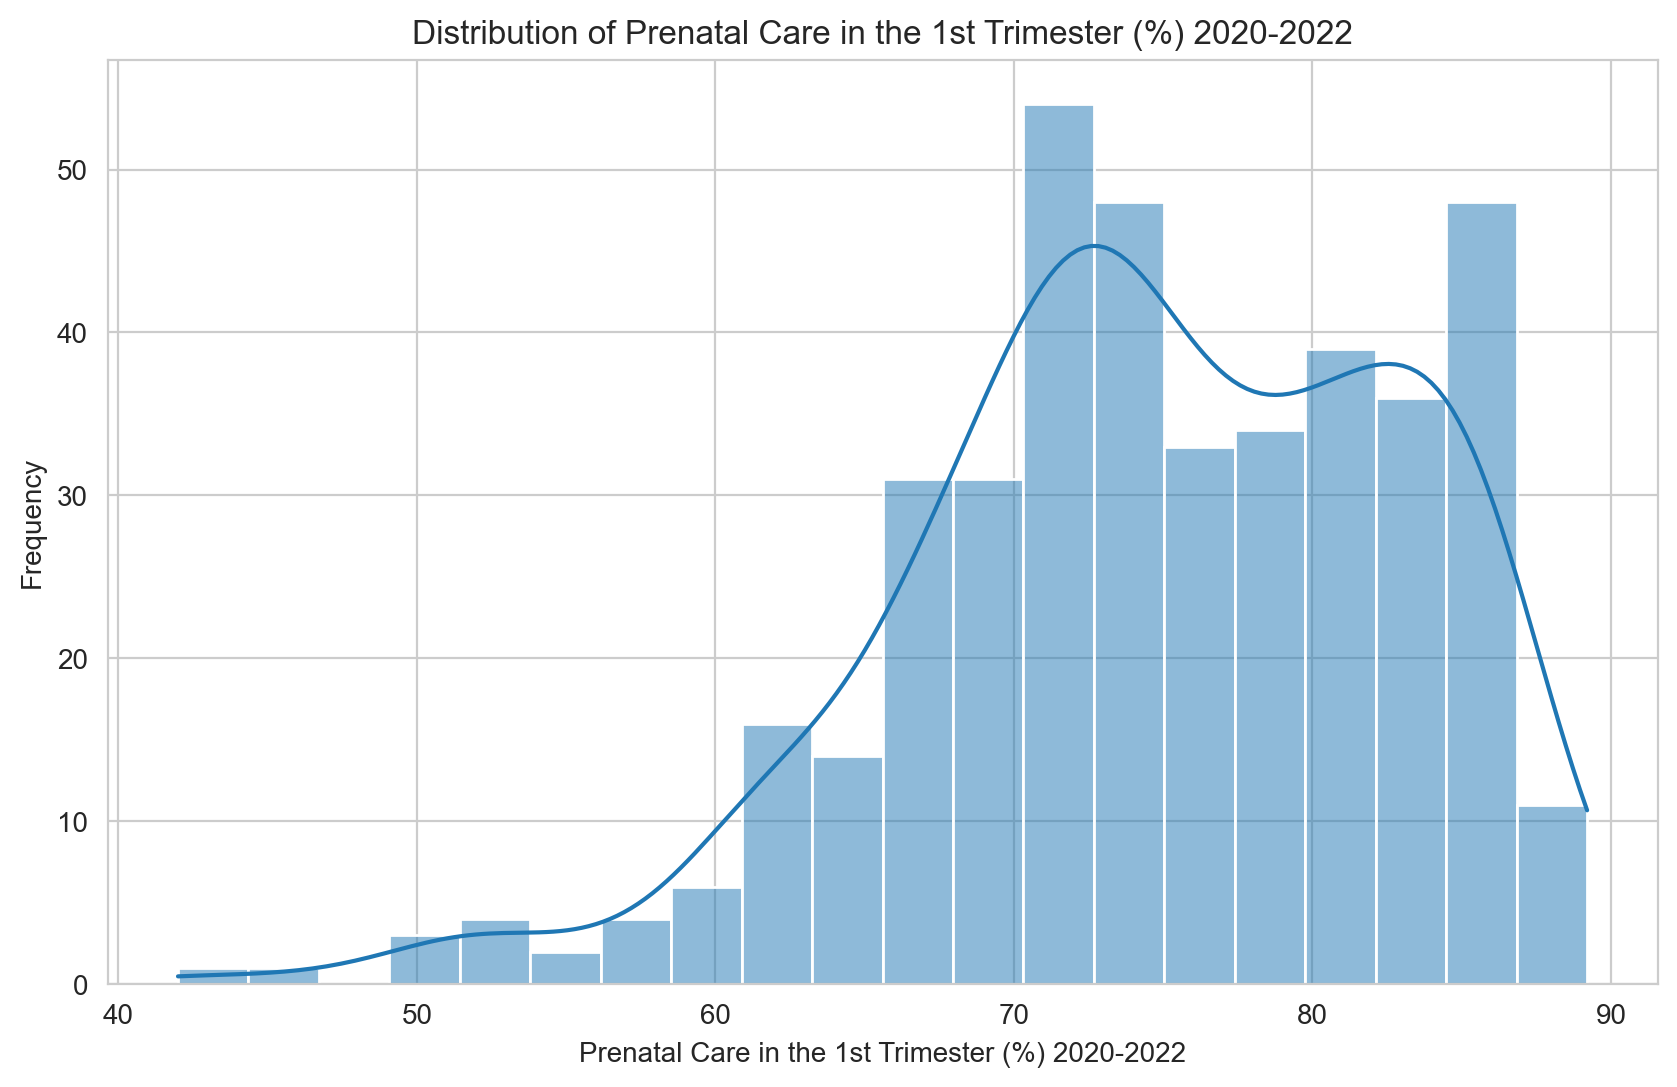

In [34]:
#create a histogram of the prenatal care in the 1st trimester rate
plt.figure(figsize=(10, 6))
sns.histplot(df['Prenatal Care in the 1st Trimester (%) 2020-2022'], bins=20, kde=True)
plt.title('Distribution of Prenatal Care in the 1st Trimester (%) 2020-2022')
plt.xlabel('Prenatal Care in the 1st Trimester (%) 2020-2022')
plt.ylabel('Frequency')
plt.show()


<h5 style="color: orange;"> 

This histogram demonstrates how many reigions had specific percentages of mothers beginning prenatal care during the 1st trimester. The timing of prenatal care is an important measure of the health of a pregnancy and the child. During the 1st trimester, there is rapid fetal development, during which early detection and managment of health risks including environmental and dietary toxins of the mother are essential to controlling for the health of the developing fetus. 

The majority of counties fall within 65% to 85% of mothers reciveing prenatal care in the first trimester, aligning with the national average of 76.1%. 

Although many pregnant individuals are recieving prenatal care in the first trimester, there are many counties where the percentage of pregnant indivuals falls below 60%, signifying a lack in access and potentially knowledge of the importance of these services. </h5>

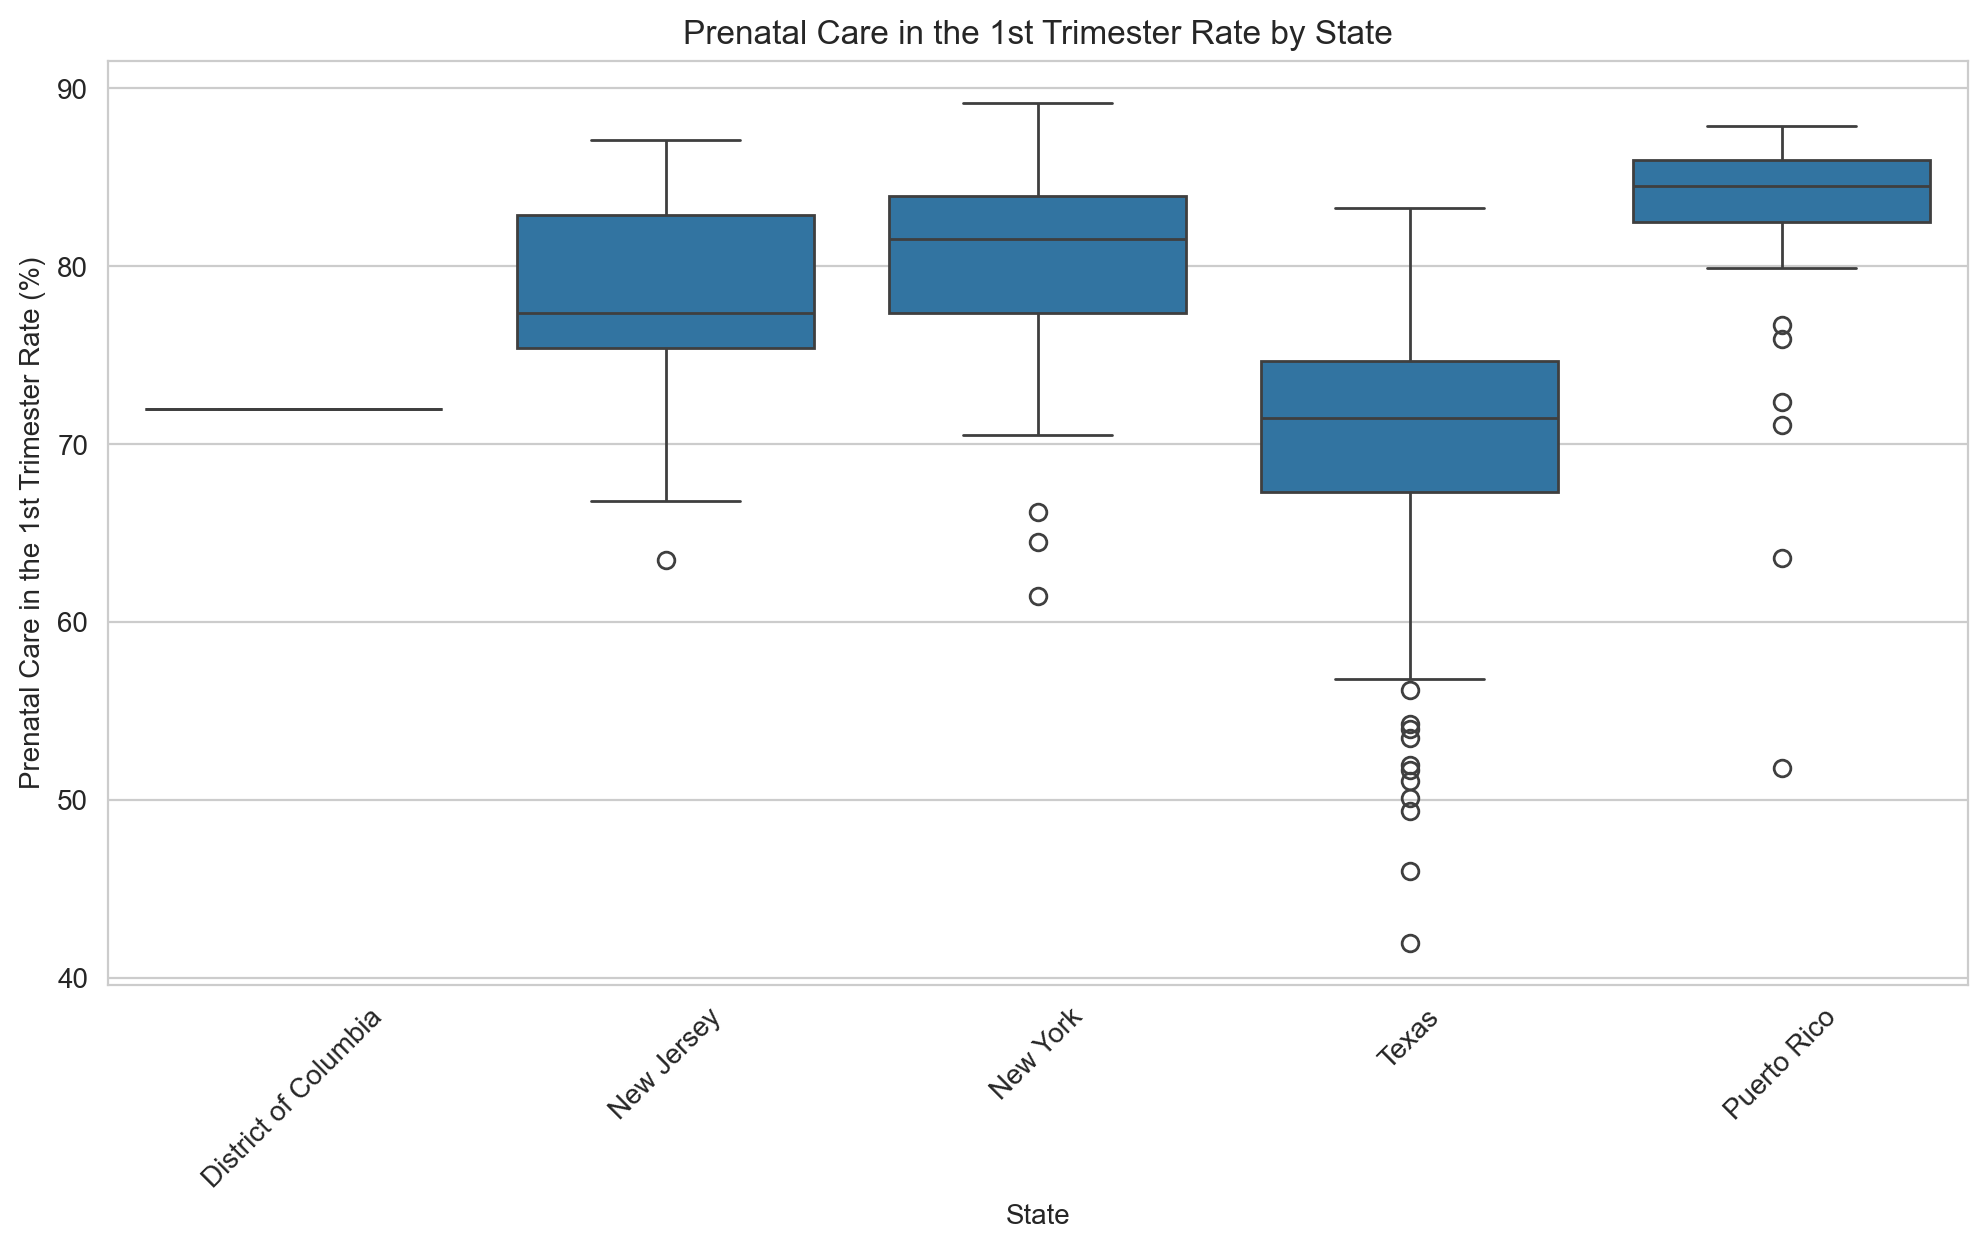

In [35]:
#create a boxplot of the prenatal care in the 1st trimester rate separated by state
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='State', y='Prenatal Care in the 1st Trimester (%) 2020-2022')
plt.title('Prenatal Care in the 1st Trimester Rate by State')
plt.xlabel('State')
plt.ylabel('Prenatal Care in the 1st Trimester Rate (%)')
plt.xticks(rotation=45)
plt.show()

<h5 style="color: orange;"> 

These boxplots divide the above percentages of pregnant idividuals recieving prenatal care in the first trimester by state. 

The greatest rate of individuals receiving early prenatal care is in Puerto Rico, where the percetnages are also the most consistent as there is a small range in msot common values. 

The lowest median value is recorded in Texas, which also has the greatest variability between counties. There are many potential outlier values below the lower quartile value, indicating many areas where the percentage of individuals receiving prenatal care in the first trimester is below 55% on multiple occasions. 

Again, D.C. has a singular recorded value that is close to the median value of Texas. This is lower than the national average.</h5>

*<h4 style="color: #ff5ab2;">Population Density - Women 15-44 Years of Age</h1>*

In [36]:
#convert population density to numeric and get summary statistics
df['Population Density - Women 15-44 Years of Age'] = pd.to_numeric(df['Population Density - Women 15-44 Years of Age'], errors='coerce')
df['Population Density - Women 15-44 Years of Age'].describe()

count      338.000000
mean       178.392604
std       1114.143732
min          0.000000
25%          1.500000
50%          6.900000
75%         28.075000
max      16127.700000
Name: Population Density - Women 15-44 Years of Age, dtype: float64

<h5 style="color: orange;"> 

There are 338 counties or regions included in the dataset for the variable, Population Density - Women 15-44 Years of Age.

The mean value is 178.39, but the median value is 6.9. Therefore, it can be assumed that there are many areas with low density, but a few extremely dense urban regions inflating the mean value. </h5>

In [37]:
#population density summary statistics separated by state
df_grouped_population_density = df.groupby('State')['Population Density - Women 15-44 Years of Age'].describe().reset_index()
df_grouped_population_density.columns = ['State', 'count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']
df_grouped_population_density = df_grouped_population_density.sort_values(by='mean', ascending=False)
df_grouped_population_density

,State,count,mean,std,min,25%,50%,75%,max
0,District of Columbia,1.0,2881.600000,NaN,2881.6,2881.600,2881.60,2881.600,2881.6
2,New York,62.0,665.419355,2481.057805,0.3,11.425,20.05,70.225,16127.7
1,New Jersey,21.0,469.904762,761.768407,33.5,55.000,190.70,513.500,3410.6
4,Texas,254.0,24.768110,75.199997,0.0,1.000,3.30,11.700,622.1
3,Puerto Rico,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h5 style="color: orange;"> 


Divided by areas of interest, the greatest mean population density of women between 15 and 44 is in the District of Columbia. However the maximum recorded value is 16,127.7 from New York. </h5>

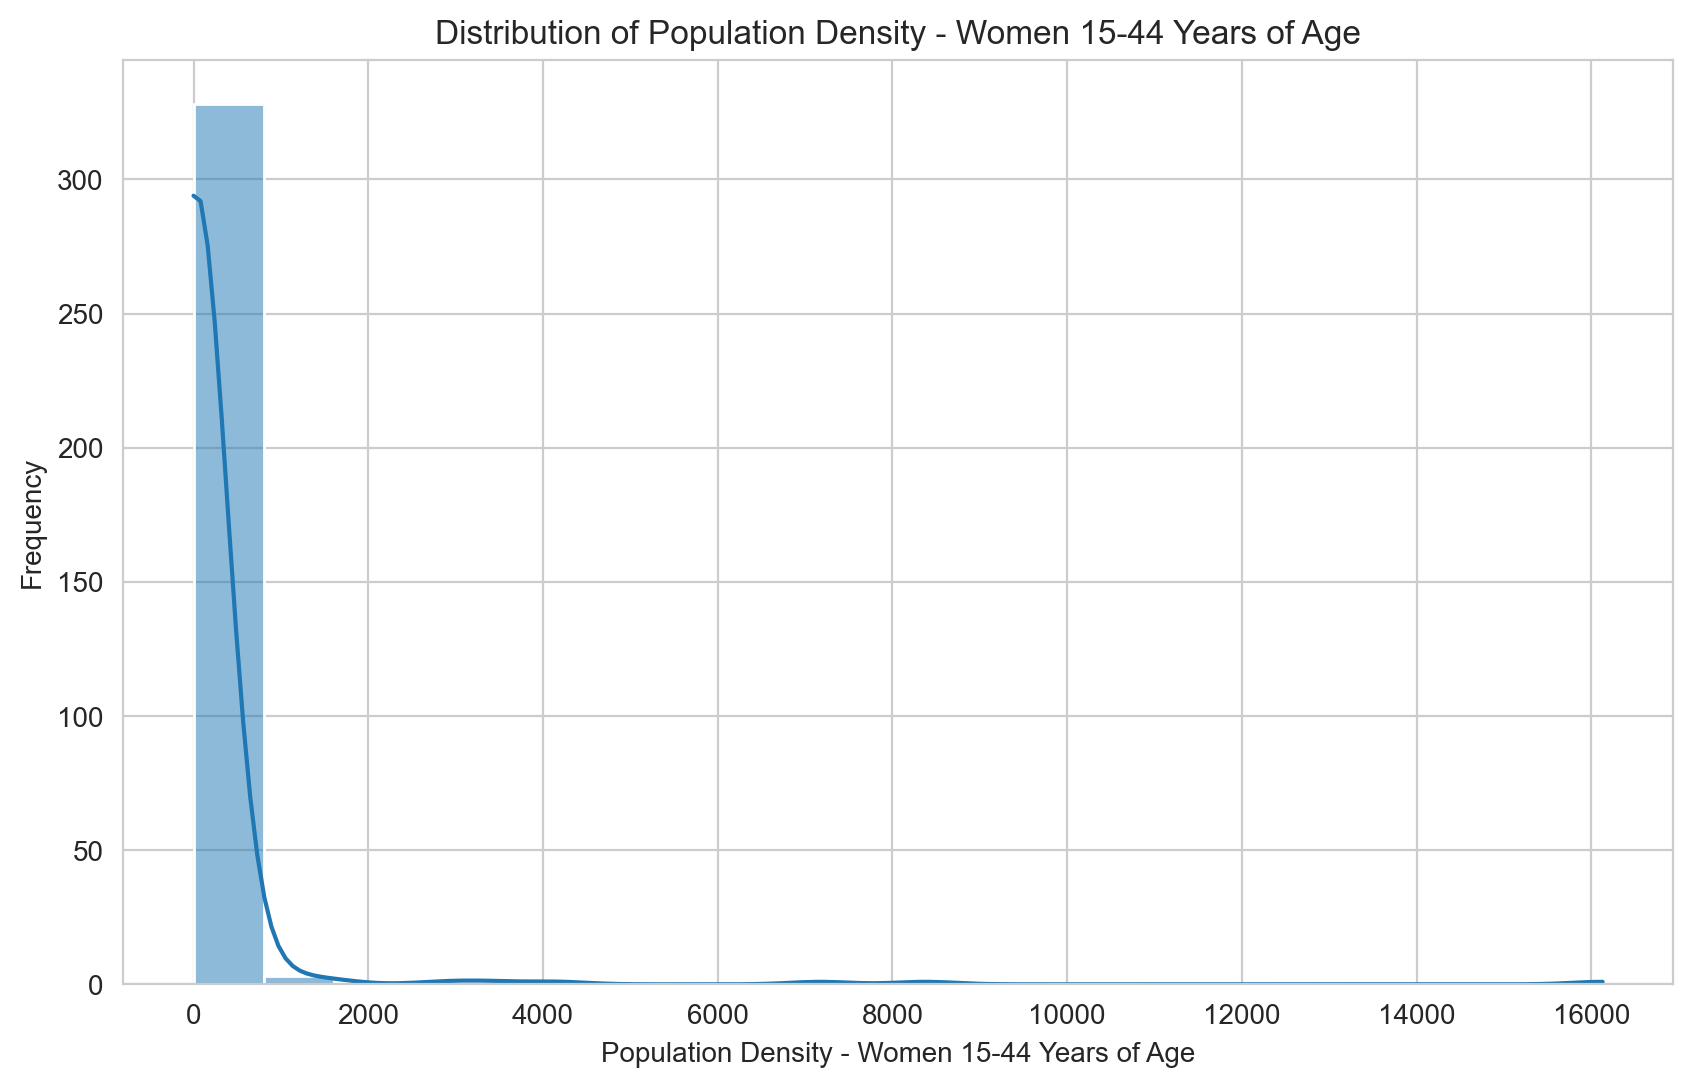

In [38]:
#create a sideways histogram of the population density
plt.figure(figsize=(10, 6))
sns.histplot(df['Population Density - Women 15-44 Years of Age'], bins=20, kde=True)
plt.title('Distribution of Population Density - Women 15-44 Years of Age')
plt.xlabel('Population Density - Women 15-44 Years of Age')
plt.ylabel('Frequency')
plt.show()

<h5 style="color: orange;"> 

This histogram demonstrates the population density of women aged 15-44 across all recorded counties. 

The great majority of recorded counties have low female population density, and there is a severe drop-off greater than 1,000 people per square mile. 

There are rare counties with extremely dense areas, over 10,000 people. 

It can be assumed that there are many women of reproductive age across these selected states living in areas of low population density, possibly impacting access to OB-GYNs due to distance and availability. </h5>

*<h4 style="color: #ff5ab2;">NCHS Urban-Rural Classification</h1>*

In [39]:
# can you tell me the value types of nchs urban rural classification
df['NCHS Urban-Rural Classification'].value_counts()

NCHS Urban-Rural Classification
Non-core               136
Micropolitan            60
Large fringe metro      55
Medium metro            38
Small metro             32
Large central metro     17
Name: count, dtype: int64

<h5 style="color: orange;"> 

This data is categorical in nature. The greatest number of classification by county is non-core, and the least prevalent is large central metro. The non-core classification represents a county that is not part of a metropolitan or micropolitan area. Generally, this means the county is more rural. </h5>

In [40]:
#can you tell me if there are any missing values in the NCHS Urban-Rural Classification
df['NCHS Urban-Rural Classification'].isnull().sum()


np.int64(78)

<h5 style="color: orange;"> 

There are missing values in the NCHS Urban-Rural Classification data column, as this was not recorded for Puerto Rico. That makes up 78 values. </h5>

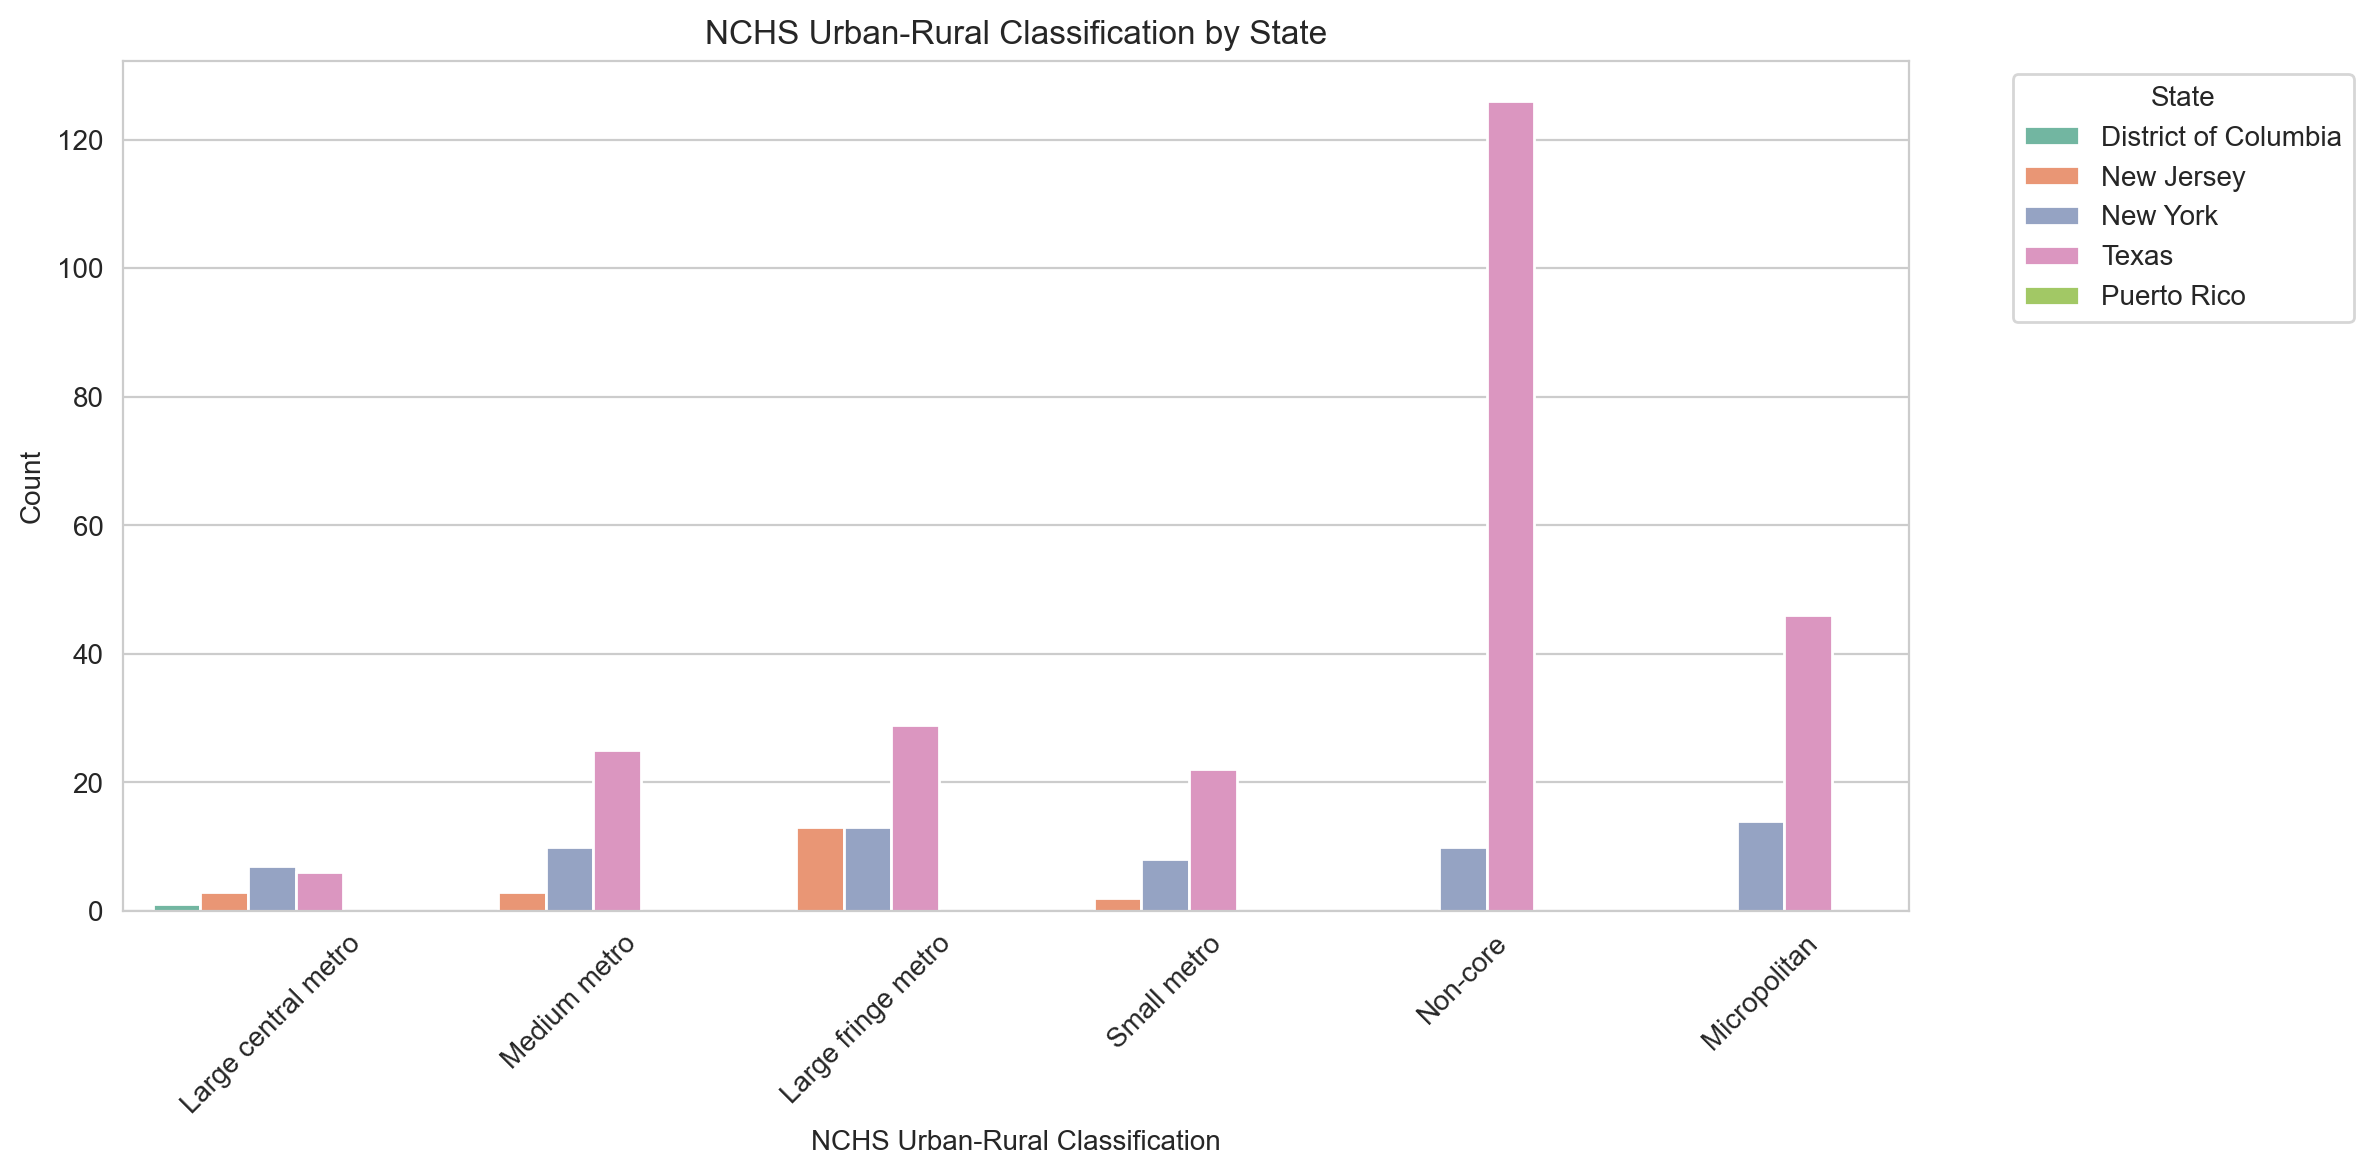

In [41]:
#can you make a chart of the nchs urban rural classification and states
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='NCHS Urban-Rural Classification', hue='State', palette='Set2')
plt.title('NCHS Urban-Rural Classification by State')
plt.xlabel('NCHS Urban-Rural Classification')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<h5 style="color: orange;"> 

This bar chart demonstrates how many counties, divided by state, fall into each NCHS urban-rural classification.

Visualizing this data between categories, and between states by colors grants the possibility to consider which state has the greatest prevalence of each classification value. 
Texas has the greatest counts overall because it is the largest, but it also has by far the greatest count of non-core counties. 

New Jersey does not have any non-core of micropolitan counties. New Jersey and New York have the same count of large fringe metro counties, though New York has greater counts for the remaining categories. </h5>

In [42]:
#can you give proportions of the NCHS Urban-Rural Classification by state
nchs_proportions = df.groupby('State')['NCHS Urban-Rural Classification'].value_counts(normalize=True).unstack().fillna(0)
nchs_proportions = nchs_proportions.reset_index()
nchs_proportions.columns.name = None
nchs_proportions = nchs_proportions.rename(columns={'Urban': 'Urban Proportion', 'Rural': 'Rural Proportion'})
nchs_proportions = nchs_proportions.set_index('State')
nchs_proportions

,Large central metro,Large fringe metro,Medium metro,Micropolitan,Non-core,Small metro
State,,,,,,
District of Columbia,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
New Jersey,0.142857,0.619048,0.142857,0.000000,0.000000,0.095238
New York,0.112903,0.209677,0.161290,0.225806,0.161290,0.129032
Texas,0.023622,0.114173,0.098425,0.181102,0.496063,0.086614


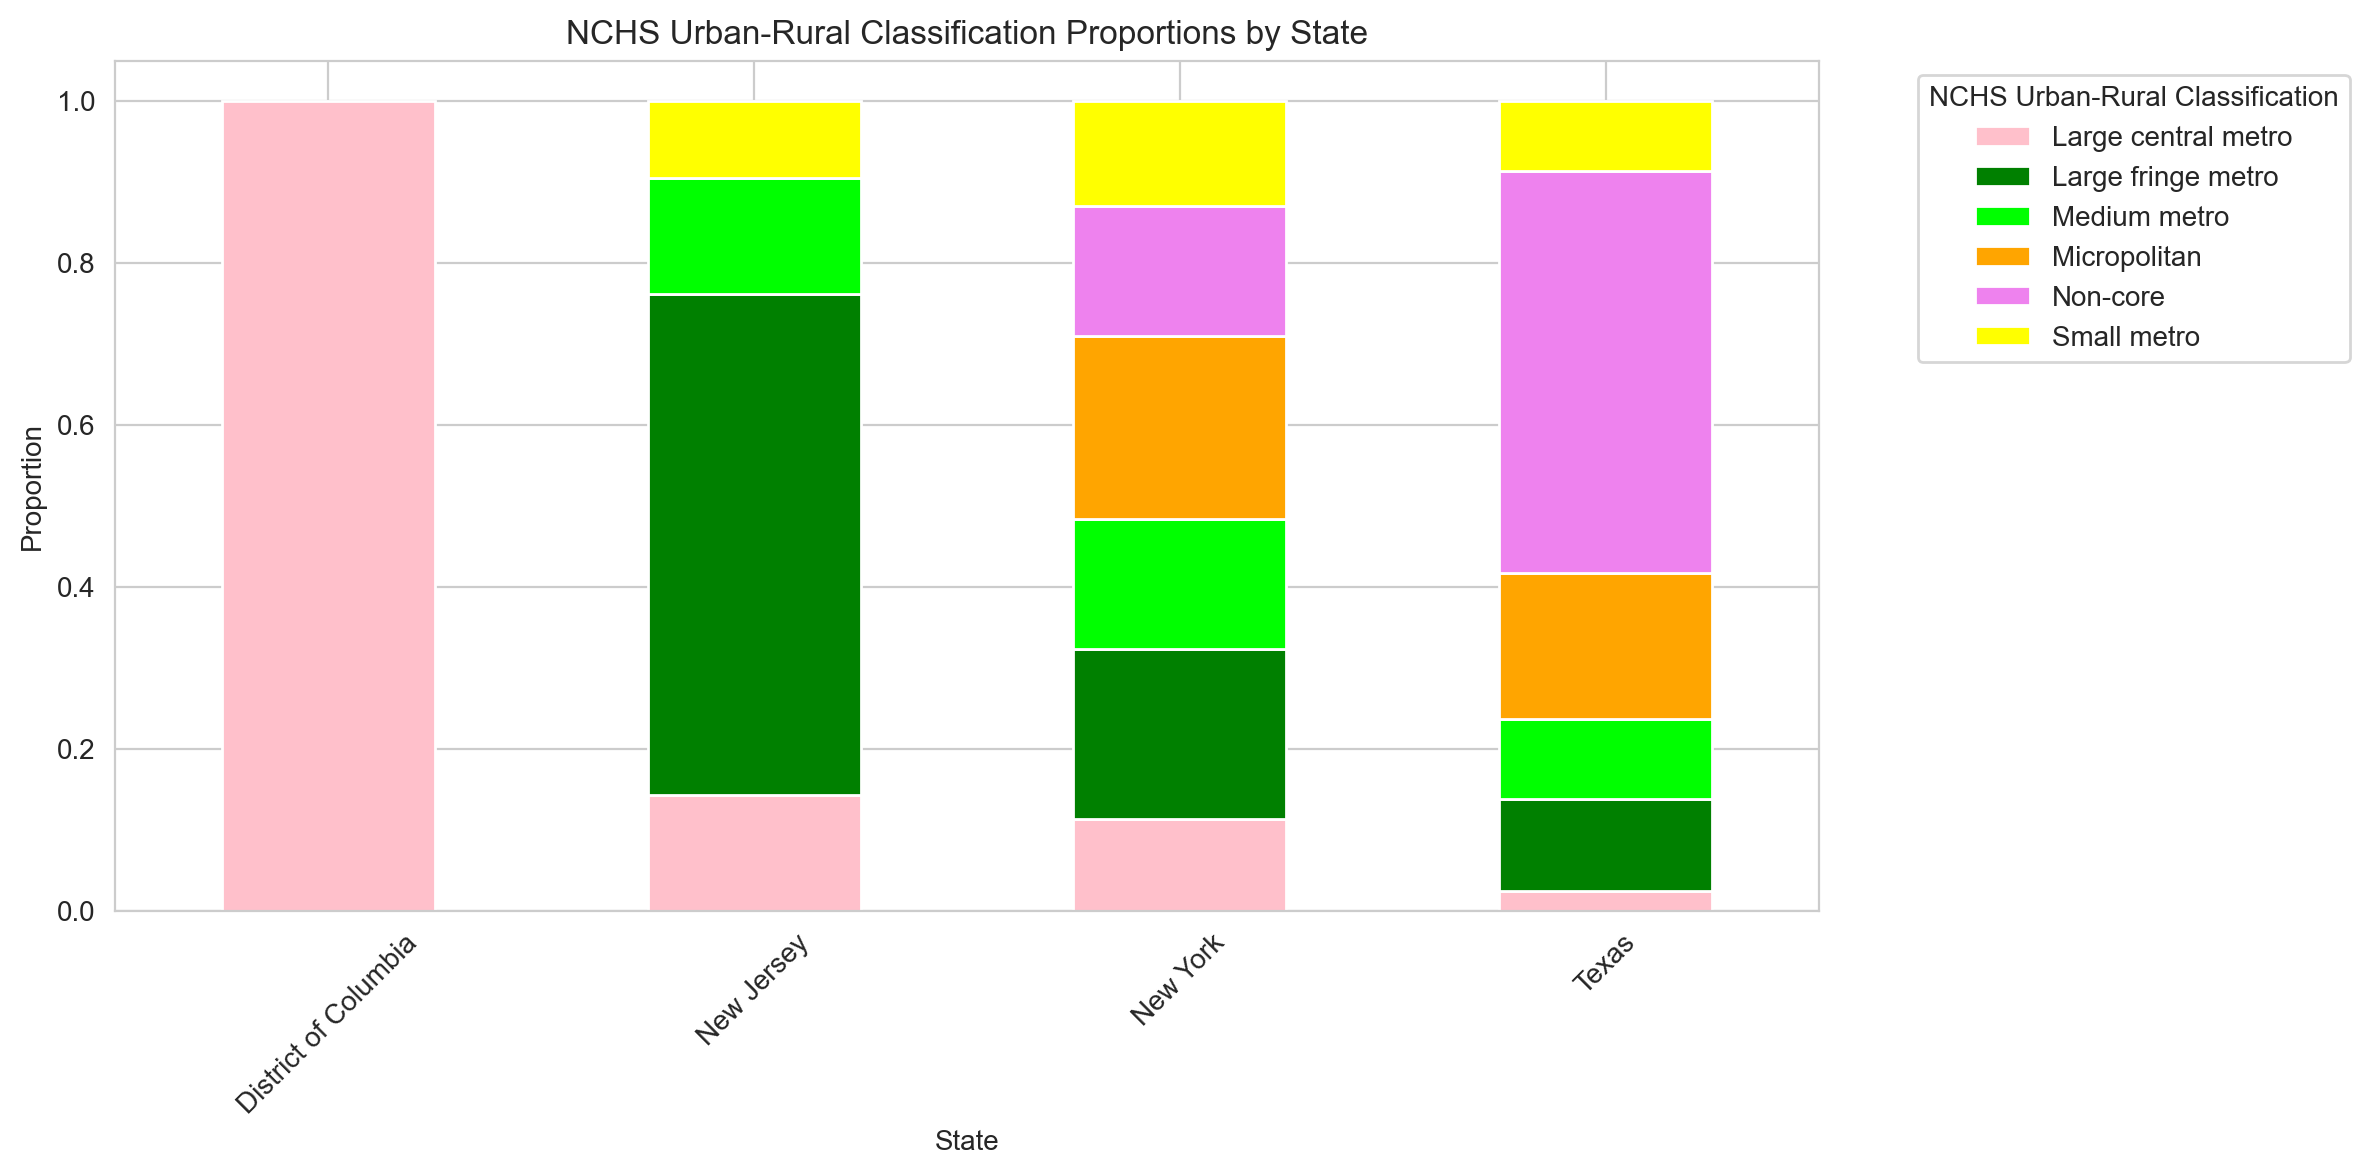

In [43]:
colors = {'Large central metro': 'pink',
          'Large fringe metro': 'green',
          'Medium metro': 'lime',
          'Micropolitan': 'orange',
          'Non-core': 'violet',
          'Small metro': 'yellow'}
ax = nchs_proportions.plot(kind='bar', stacked=True, 
                          figsize=(12, 6), 
                          color=[colors[x] for x in nchs_proportions.columns])

plt.title('NCHS Urban-Rural Classification Proportions by State')
plt.xlabel('State')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='NCHS Urban-Rural Classification', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

<h5 style="color: orange;"> 

The bar chart helps to determine the makeup of each state individually in terms of the NCHS Urban-Rural Classifications of its counties. 

The District of Columbia is one singular large central metro area. 

New Jersey is mostly large fringe metro, with great proportions of medium and large central metro areas as well. New York is diverse across all categories.

Texas is majority non-core or rurla areas, but also micropolitan and more diverse classifications. 

Again, it is important to consider the large proportion of rural area within Texas when considering access and availability of resources for pregnant individuals. The barriers faces by pregnant individuals unable to access care in rural Texas may look very different from an inidividual in the large fringe metro counties of New Jersey, but both may result in the same detrimental outcomes. </h5>

*<h4 style="color: #ff5ab2;">Relational Plots</h1>*

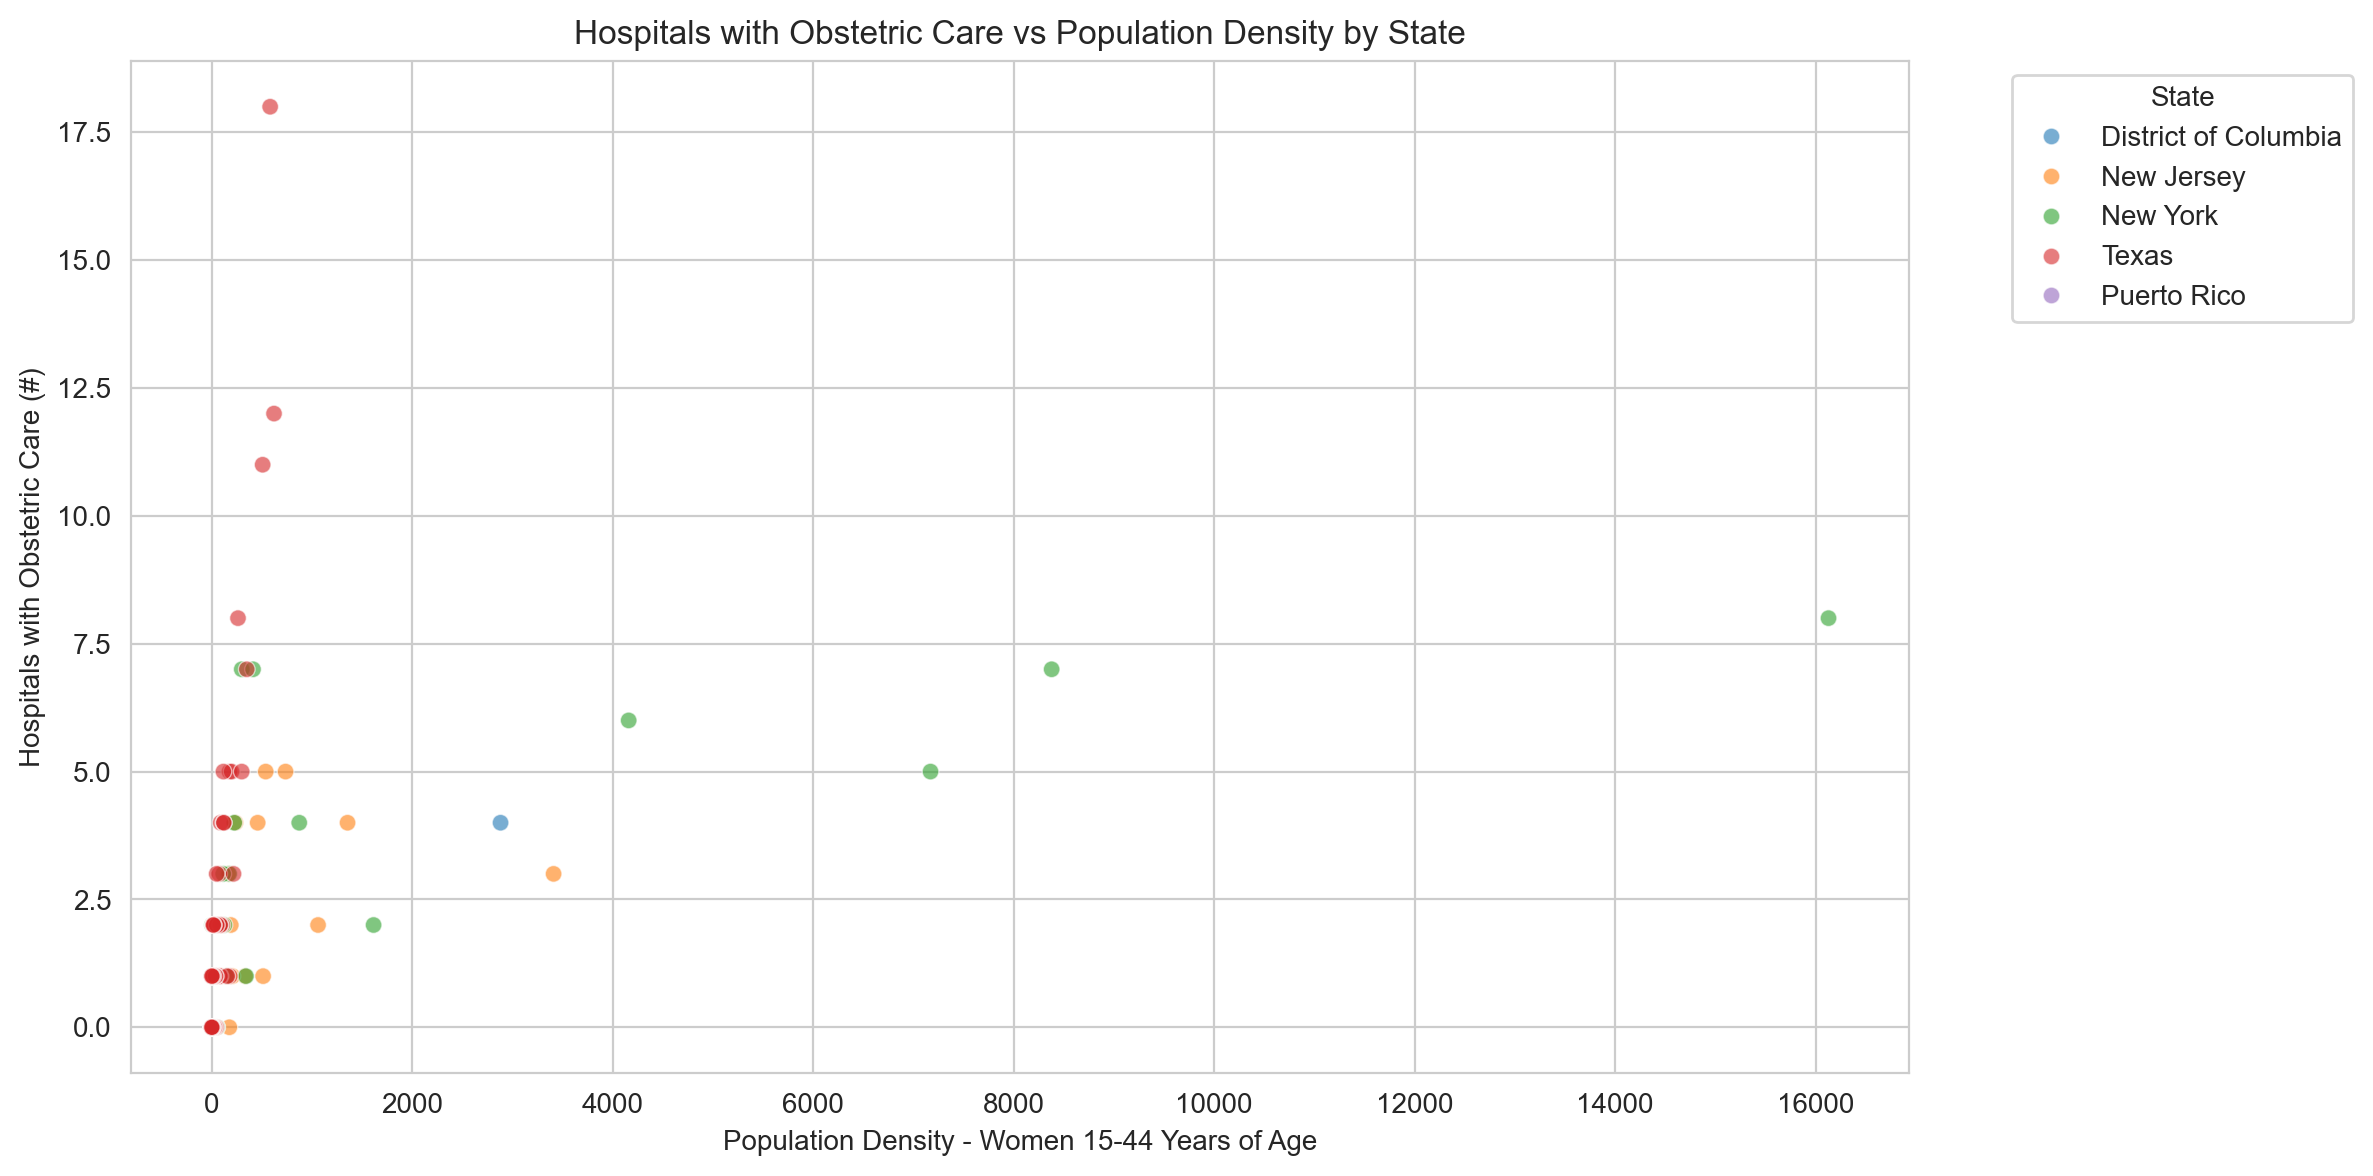

In [44]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, 
                x='Population Density - Women 15-44 Years of Age', 
                y='Hospitals with Obstetric Care (#)',
                hue='State',
                alpha=0.6)
plt.title('Hospitals with Obstetric Care vs Population Density by State')
plt.xlabel('Population Density - Women 15-44 Years of Age')
plt.ylabel('Hospitals with Obstetric Care (#)')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<h5 style="color: orange;"> 

There is no clear linear relationship, as the number of hospitals does not consistently increase with population density of women. 

Texas, red, shows many low density areas representing the many rural counties. However, many low density areas also have no obstetric services. 

New York, green, has the highest population density of women point, which reflects 7 hospitals that have obstetric care. 

The District of Columbia, blue, has a singular plotted point with more density of women served by the same number of hospitals as New Jersey and New York counties with much less population density.

New Jersey has both moderate density and hospital availability. 

There is no population density data available for Puerto Rico. </h5>

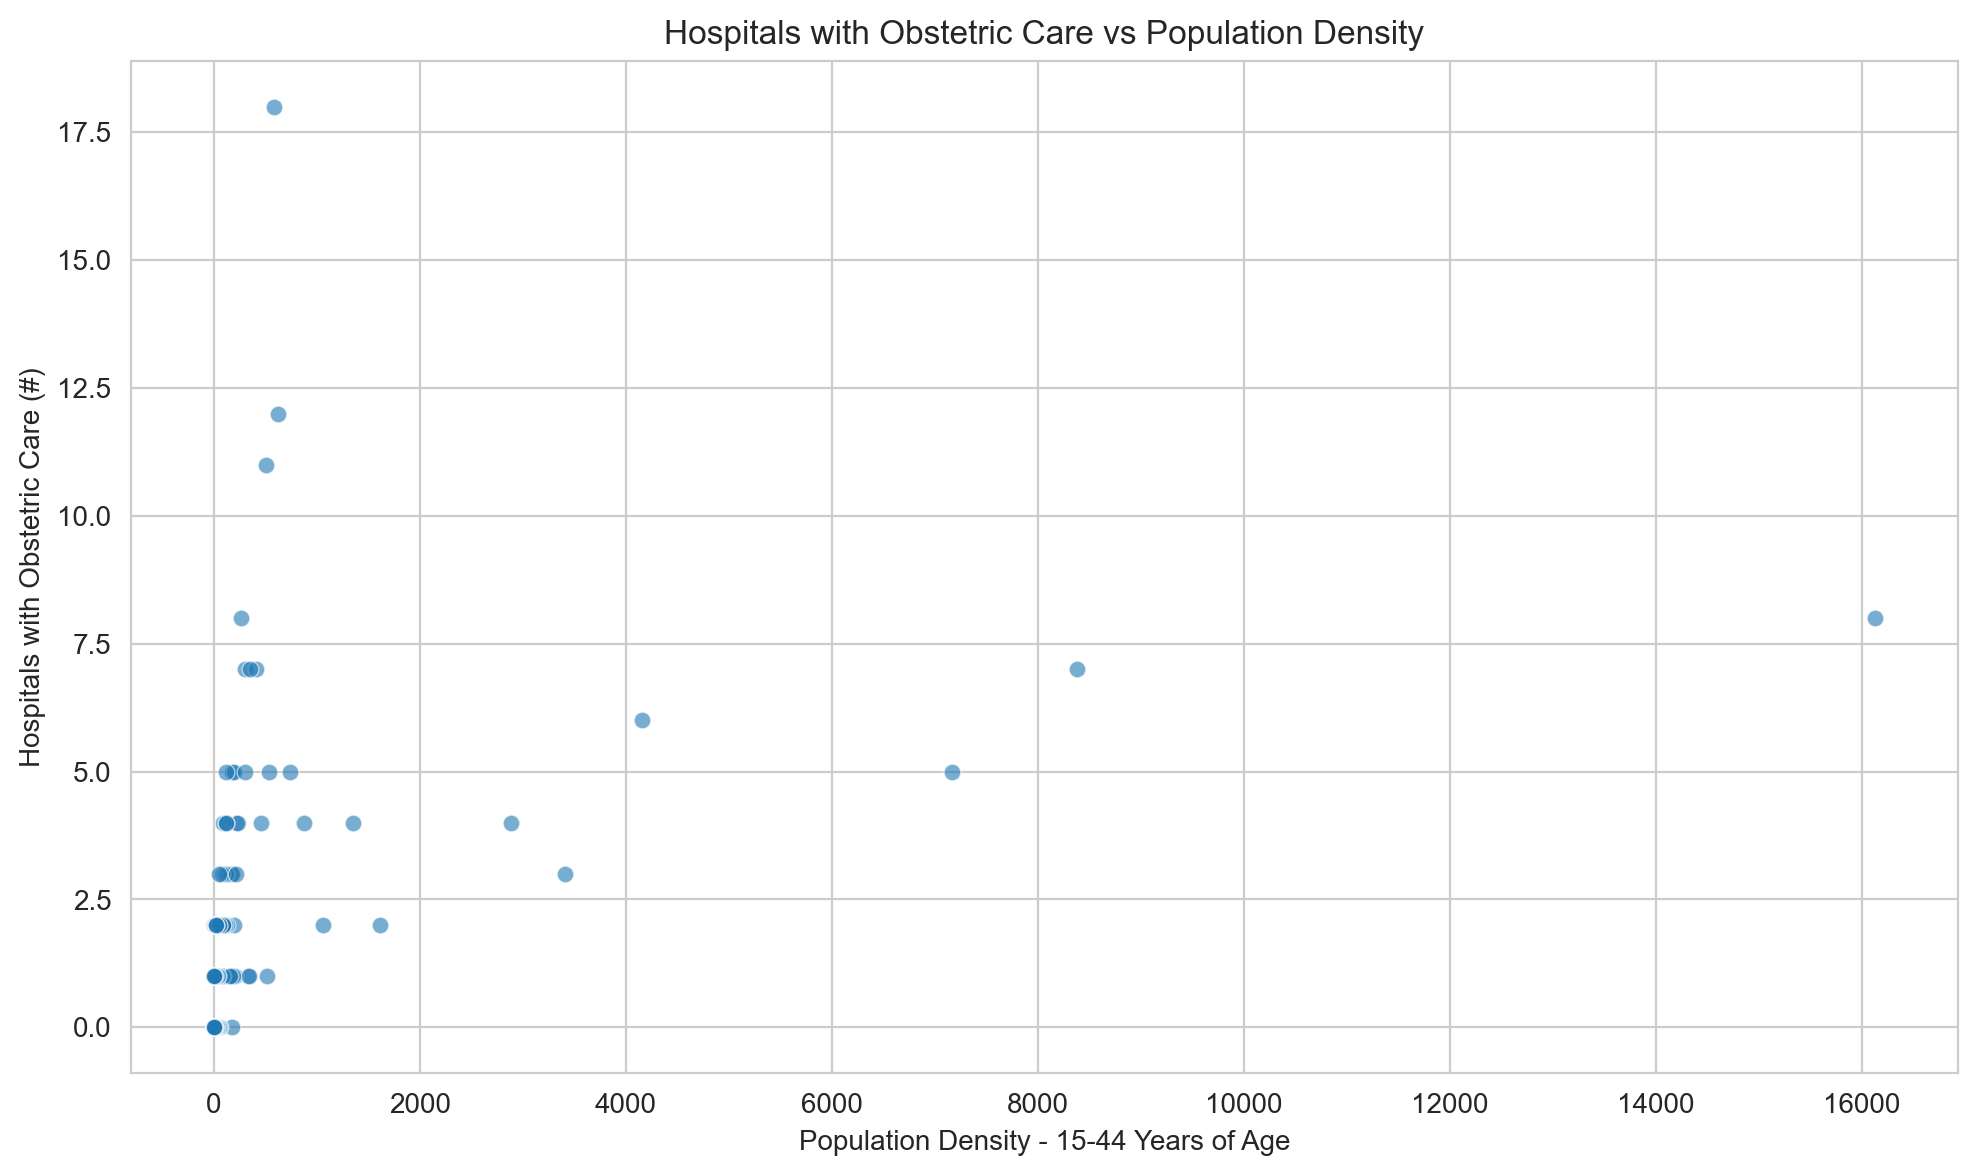

In [45]:
#create a scatter plot of the hospitals with obstetric care and the population density without dividing by state
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, 
                x='Population Density - Women 15-44 Years of Age',
                y='Hospitals with Obstetric Care (#)',
                alpha=0.6)
plt.title('Hospitals with Obstetric Care vs Population Density')
plt.xlabel('Population Density - 15-44 Years of Age')
plt.ylabel('Hospitals with Obstetric Care (#)')
plt.tight_layout()
plt.show()

<h5 style="color: orange;"> 

This scatterplot demonstrates the same data variables compared but without the color divisions by state. It is interesting to look at the variability of hospitals and population density of women without assumptions about the states. </h5>

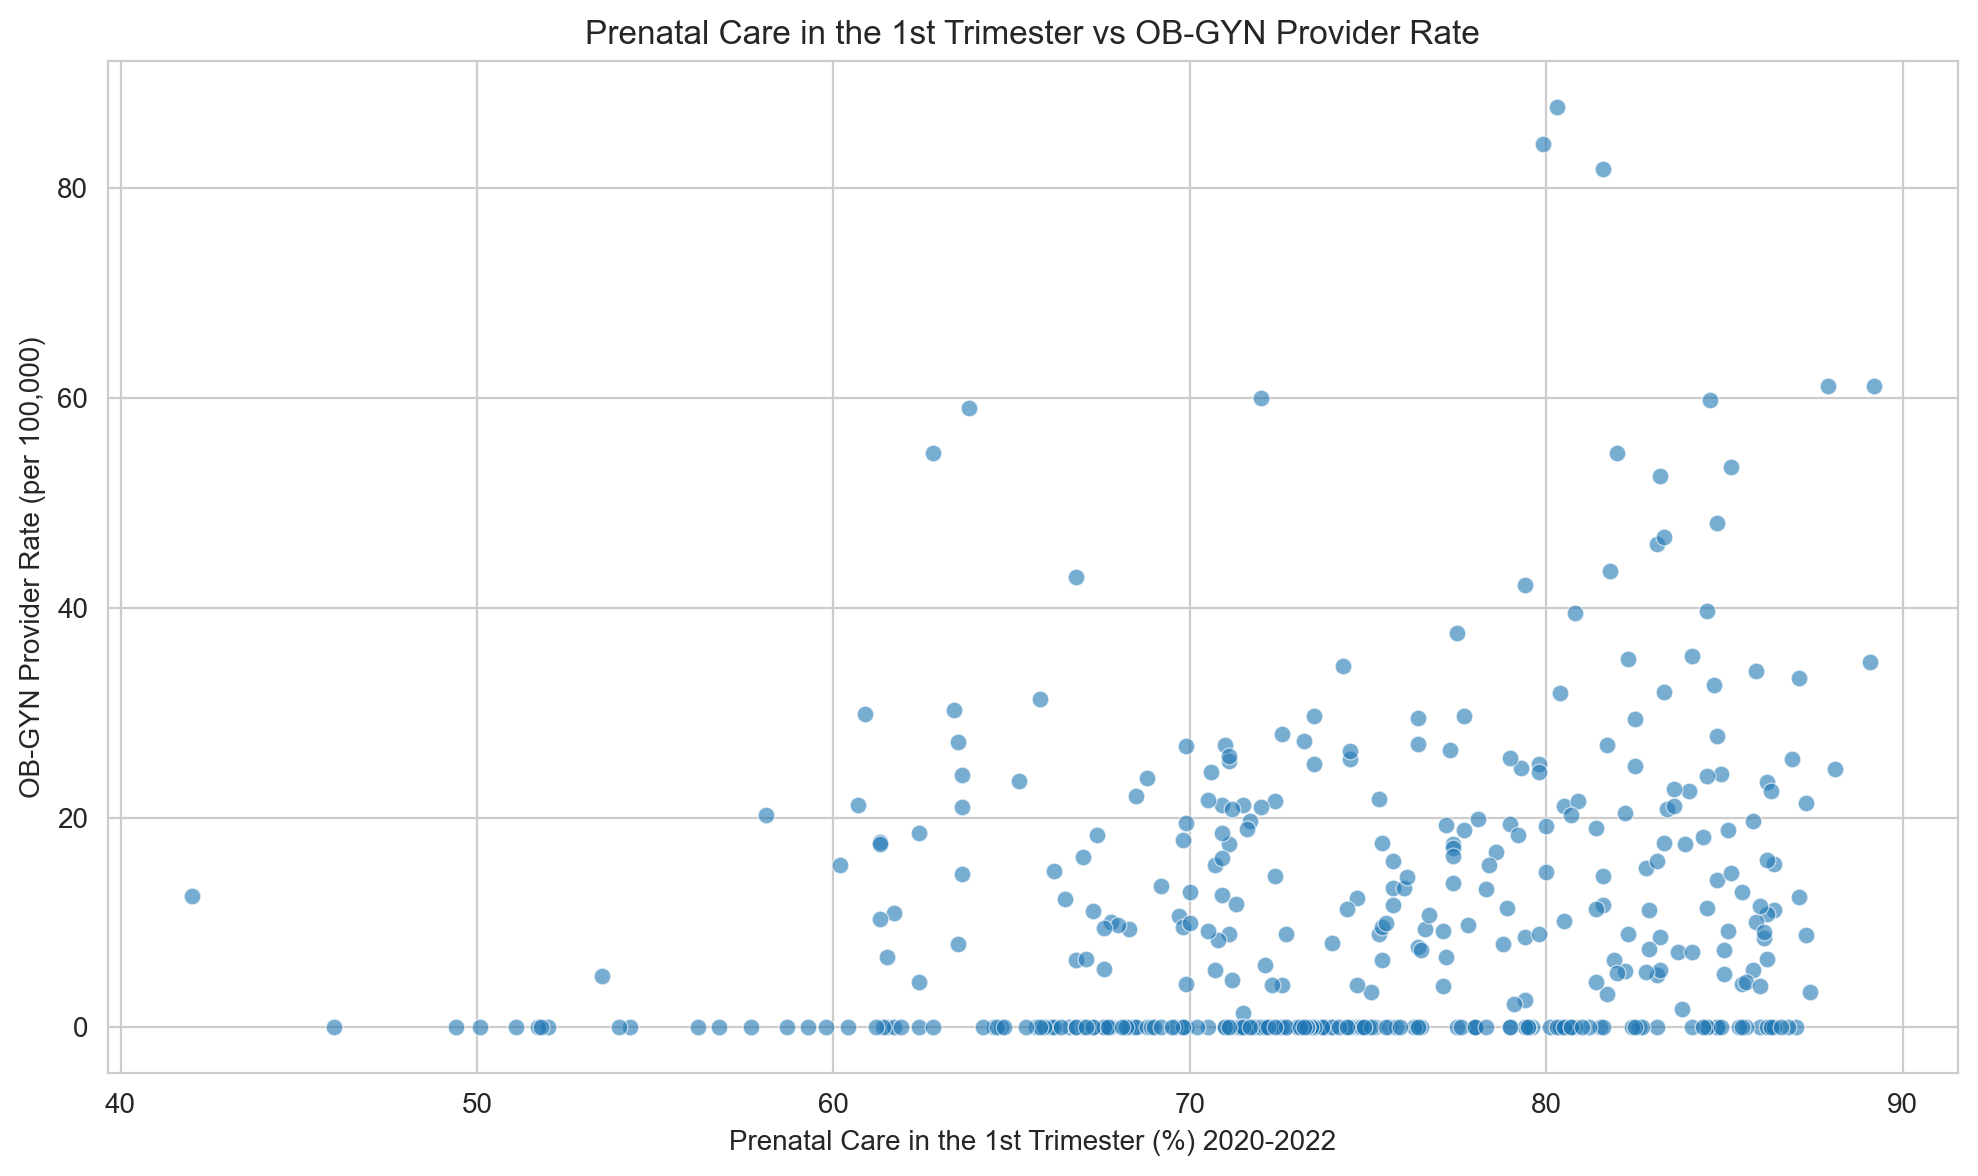

In [46]:
# make a scatter plot of the prenatal care in the 1st trimester and the provider rate
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, 
                x='Prenatal Care in the 1st Trimester (%) 2020-2022', 
                y='OB-GYN Provider Rate (per 100,000)',
                alpha=0.6)
plt.title('Prenatal Care in the 1st Trimester vs OB-GYN Provider Rate')
plt.xlabel('Prenatal Care in the 1st Trimester (%) 2020-2022')
plt.ylabel('OB-GYN Provider Rate (per 100,000)')
plt.tight_layout()
plt.show()

<h5 style="color: orange;"> 

This scatterplot shows the relationship between Prenatal Care in the 1st Trimester (%) and OB-GYN Provider Rate (per 100,000). 

There appears to be a positive association that as the OB-GYN Provider Rate increases, the percentage of pregnant individuals receiving prenatal care in the first trimester increases. 

Though there are many data points at OB-GYN provider rates of zero, this may hint that people receiving care must go outside of their county to access care. </h5>

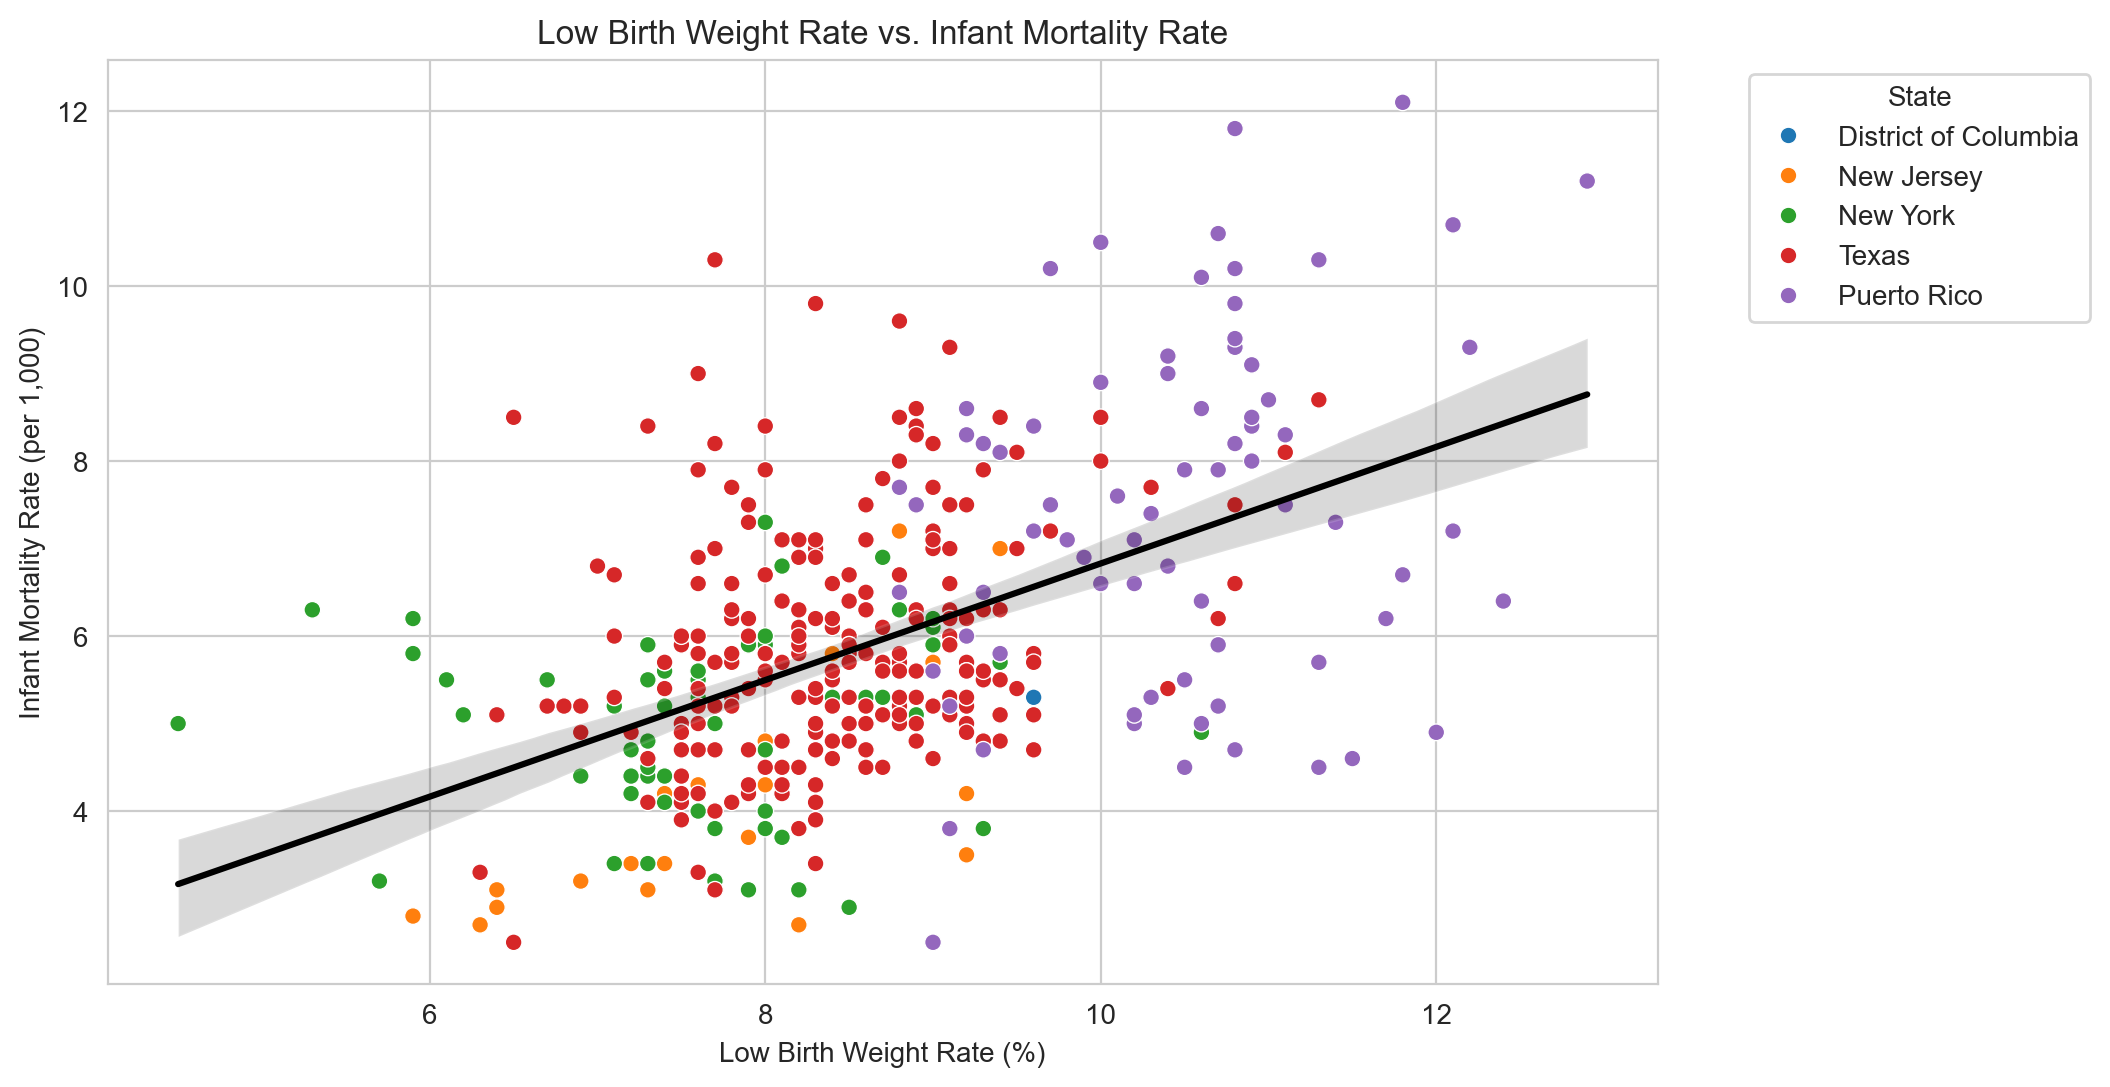

In [47]:
#create a scatter plot of the low birth weight rate including a regression line, make each state a different color
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Low Birth Weight (%) 2020-2022', y='Infant Mortality Rate (per 1,000) 2020-2022', hue='State', palette='tab10')
sns.regplot(data=df, x='Low Birth Weight (%) 2020-2022', y='Infant Mortality Rate (per 1,000) 2020-2022', scatter=False, color='black')
plt.title('Low Birth Weight Rate vs. Infant Mortality Rate')
plt.xlabel('Low Birth Weight Rate (%)')
plt.ylabel('Infant Mortality Rate (per 1,000)')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<h5 style="color: orange;"> 

This scatterplot shows the relationship between Low Birth Weight Rate (%) and Infant Mortality Rate (per 1,000).

There is a positive association between low birth weight rates and infant mortality rates across the five areas of interest. This may suggest that low birth weight rates are an indicator or contributor of infant mortality rates. Puerto Rico has very scattered values, though the majority fall above the line of association. </h5>

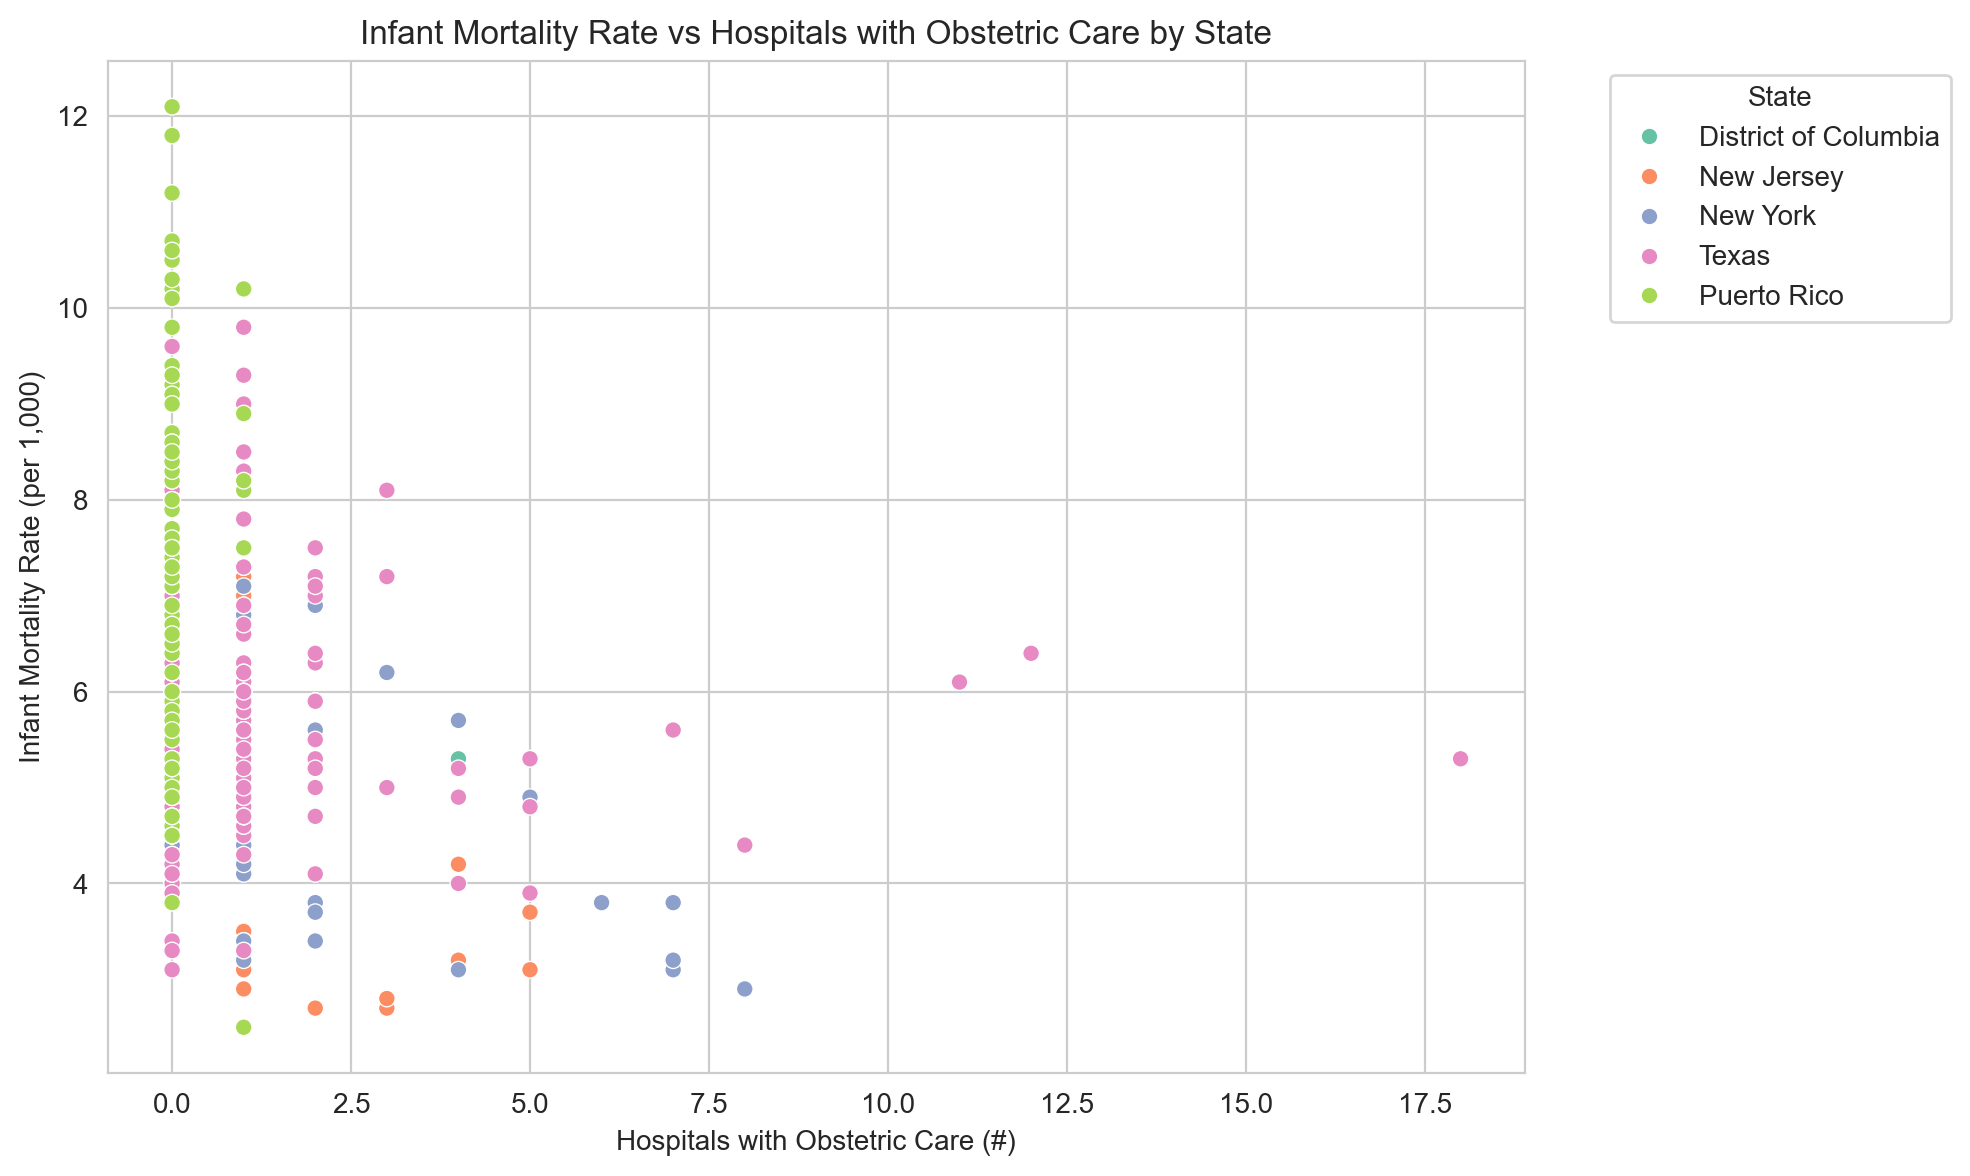

In [48]:
#can you create a correlation between the infant mortality rate and the number of hospitals with obstetric care seperated by state
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, 
                x='Hospitals with Obstetric Care (#)', 
                y='Infant Mortality Rate (per 1,000) 2020-2022', 
                hue='State', 
                palette='Set2')
plt.title('Infant Mortality Rate vs Hospitals with Obstetric Care by State')
plt.xlabel('Hospitals with Obstetric Care (#)')
plt.ylabel('Infant Mortality Rate (per 1,000)')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<h5 style="color: orange;"> 

This scatterplot represents the relationship between the number of hospitals with obstetric care and infant mortality rates across the five territories of interest. 

Overall, there appears to be an inverse trend, where areas with more hospitals offering obstetric services have lower infant mortality rates. There are a great number of areas with zero or less than two hospitals with obstetric care. 

Puerto Rico and Texas have many data points clustered at low hospital availability and high infant mortality rates, possibly pointing to a connection between access and increased infant mortality rates. </h5>

<h5 style="color: orange;"> 

